What is object detection --> https://www.ibm.com/think/topics/object-detection

What is YOLO --> https://docs.ultralytics.com/

What is the dataset --> https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection/data

<h2>Part 1</h2>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mbkinaci/fruit-images-for-object-detection")

print("Path to dataset files:", path)

#References --> MuhammedBuyukkinaci, datasets=https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection/data

Path to dataset files: /kaggle/input/fruit-images-for-object-detection


<h2>Part 2</h2>

In [2]:
import os
import yaml
from shutil import copytree, ignore_patterns
import xml.etree.ElementTree as ET

#References --> Kurra Vishnuvardhan, notebook=https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection

<h2>Part 3</h2>

In [3]:
root_path = '/kaggle/input/fruit-images-for-object-detection/'
os.listdir(root_path)

train_data_path = os.path.join(root_path,'train_zip/train')
test_data_path = os.path.join(root_path,'test_zip/test')

'''All .xml and .jpg file names'''
train_data_description = os.listdir(train_data_path)
test_data_description = os.listdir(test_data_path)


'''train_annotaion_file_paths and test_annotation_file_paths contains all .xml file paths
   train_image_file_paths and test_image_file_paths contains all .jpg file paths'''
train_annotation_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.xml' in i]
train_image_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.jpg' in i]

test_annotation_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.xml' in i]
test_image_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.jpg' in i]

print(f'length of training Data {len(train_image_file_paths)}, length of test data {len(test_image_file_paths)}')

#References --> Kurra Vishnuvardhan, notebook=https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection

length of training Data 240, length of test data 60


<h2>Part 4</h2>

In [4]:
'''Creating required directories to labels'''
for i in ['train/labels','test/labels']:
    os.makedirs(os.path.join('/kaggle/working/object_detection/',i))


'''Copying all images to required directories'''
copytree(train_data_path,'/kaggle/working/object_detection/train/images/',ignore = ignore_patterns('*.xml'))
copytree(test_data_path,'/kaggle/working/object_detection/test/images/',ignore = ignore_patterns('*.xml'))

#References --> Kurra Vishnuvardhan, notebook=https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection

'/kaggle/working/object_detection/test/images/'

<h2>Part 5</h2>

In [5]:
def convert_xml_to_txt(label_path,xml_file,class_dict,destination_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    x=root.find('filename').text
    txt_file = x.replace('.jpg','.txt')
    txt_file = os.path.join(destination_file,txt_file)
    with open(txt_file,'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_dict:
                continue
            class_id = class_dict[class_name]
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            xmax = int(bbox.find('xmax').text)
            ymin = int(bbox.find('ymin').text)
            ymax = int(bbox.find('ymax').text)
            
            image_width = int(root.find('size/width').text)
            image_height = int(root.find('size/height').text)
            
            x_center = (xmin + xmax) / 2 / image_width if image_width != 0 else (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2 / image_height if image_height != 0 else (ymin + ymax) / 2
            width = (xmax - xmin) / image_width if image_width != 0 else (xmax - xmin)
            height = (ymax - ymin) / image_height if image_height != 0 else (ymax - ymin)
             
            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

            
#References --> Kurra Vishnuvardhan, notebook=https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection

<h2>Part 6</h2>

In [6]:
class_dict = {'apple':0,'banana':1,'orange':2}


dest_path = '/kaggle/working/object_detection/train/labels/'
for i in train_annotation_file_paths:
    convert_xml_to_txt(train_data_path,i,class_dict,dest_path)
    

dest_path = '/kaggle/working/object_detection/test/labels/'
for i in test_annotation_file_paths:
    convert_xml_to_txt(test_data_path,i,class_dict,dest_path)


#References --> Kurra Vishnuvardhan, notebook=https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection

<h2>Part 7</h2>

In [7]:
with open("object_detection/data.yaml","w") as file: 
    file.write("path: object_detection\n")                    
    file.write("train: /kaggle/working/object_detection/train/images\n")
    file.write("val: /kaggle/working/object_detection/test/images\n")
    file.write("names: ['apple', 'banana', 'orange']")

#References --> My python knowledge + Some editings

<h2>Part 8</h2>

In [8]:
!pip install ultralytics
#References --> https://docs.ultralytics.com/quickstart/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.

<h2>Part 9</h2>

In [9]:
from ultralytics import YOLO

# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolo11n.pt")

# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="/kaggle/working/object_detection/data.yaml", epochs=10)

#References --> https://docs.ultralytics.com/usage/python/

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


Ultralytics 8.3.121 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/object_detection/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 31.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/object_detection/train/labels... 240 images, 0 backgrounds, 33 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1225.21it/s]

train: /kaggle/working/object_detection/train/images/apple_1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      169.5         182         323         334]
train: /kaggle/working/object_detection/train/images/apple_17.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        348         479         470         442]
train: /kaggle/working/object_detection/train/images/apple_20.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      240.5         276         435         442]
train: /kaggle/working/object_detection/train/images/apple_28.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        150       169.5         250         255]
train: /kaggle/working/object_detection/train/images/apple_37.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      179.5         191         287         286]
train: /kaggle/working/object_detection/train/

train: New cache created: /kaggle/working/object_detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1111.8±1345.3 MB/s, size: 227.1 KB)


val: Scanning /kaggle/working/object_detection/test/labels... 60 images, 0 backgrounds, 4 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1311.72it/s]

val: /kaggle/working/object_detection/test/images/apple_79.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        359       449.5         564         533]
val: /kaggle/working/object_detection/test/images/apple_92.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      308.5         296         463         444]
val: /kaggle/working/object_detection/test/images/banana_87.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      489.5       155.5         213         305         389       145.5         248         261         639       183.5         246         263         729       183.5         180         283]
val: /kaggle/working/object_detection/test/images/orange_94.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      241.5         164         261         226]
val: New cache created: /kaggle/working/object_detection/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.44G      1.179      3.403      1.601         29        640: 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         56        110    0.00651      0.948      0.342      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.89G      1.059      2.934      1.459         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         56        110    0.00827      0.984      0.514      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.9G      1.052      2.379      1.413         30        640: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         56        110    0.00806          1      0.612      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.9G      1.022      2.017       1.41         23        640: 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         56        110    0.00672      0.983      0.623      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.9G      1.068      1.893      1.412         21        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         56        110      0.925       0.21      0.642      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.9G      1.048      1.754      1.406         25        640: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         56        110      0.728      0.297      0.645      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.9G     0.9872      1.688      1.322         33        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         56        110      0.809      0.621      0.794      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.9G     0.9539      1.601      1.287         30        640: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]


                   all         56        110      0.777      0.693      0.804      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.9G     0.9084      1.495      1.291         29        640: 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         56        110      0.828      0.756      0.866      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.9G     0.8952      1.445      1.293         29        640: 100%|██████████| 13/13 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         56        110      0.827      0.769      0.881      0.635



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


                   all         56        110       0.89      0.732      0.882      0.632
                 apple         22         33      0.931      0.821      0.937      0.742
                banana         21         36      0.839      0.722      0.817      0.493
                orange         21         41      0.899      0.654      0.892      0.662


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


<h2>Part 10</h2>

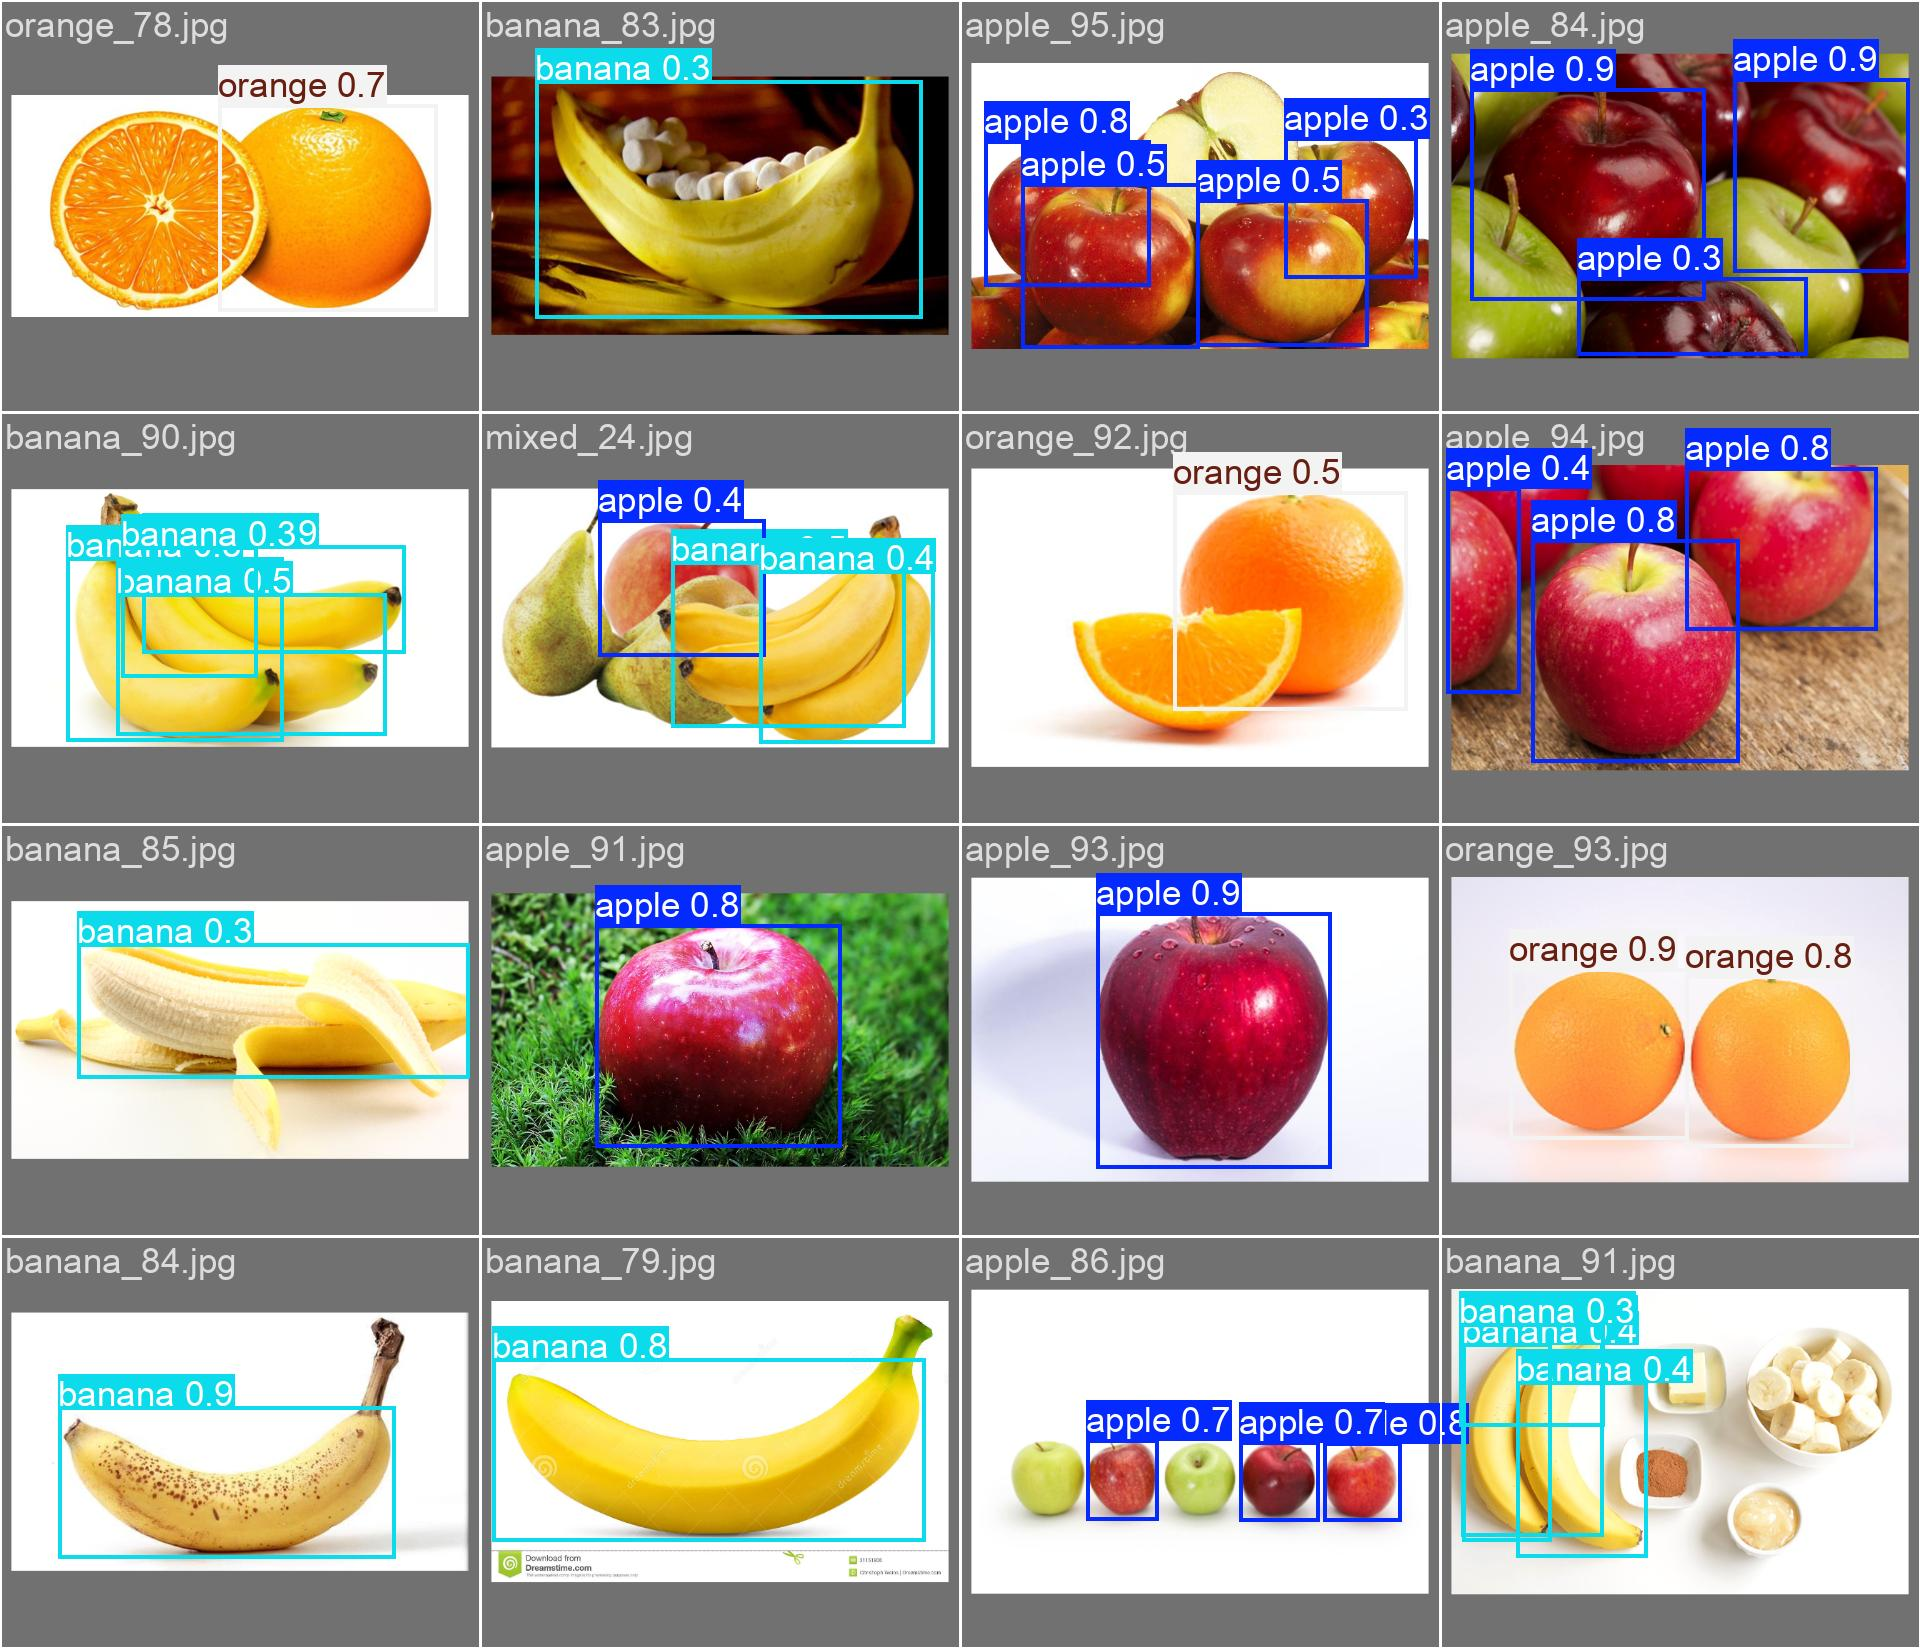

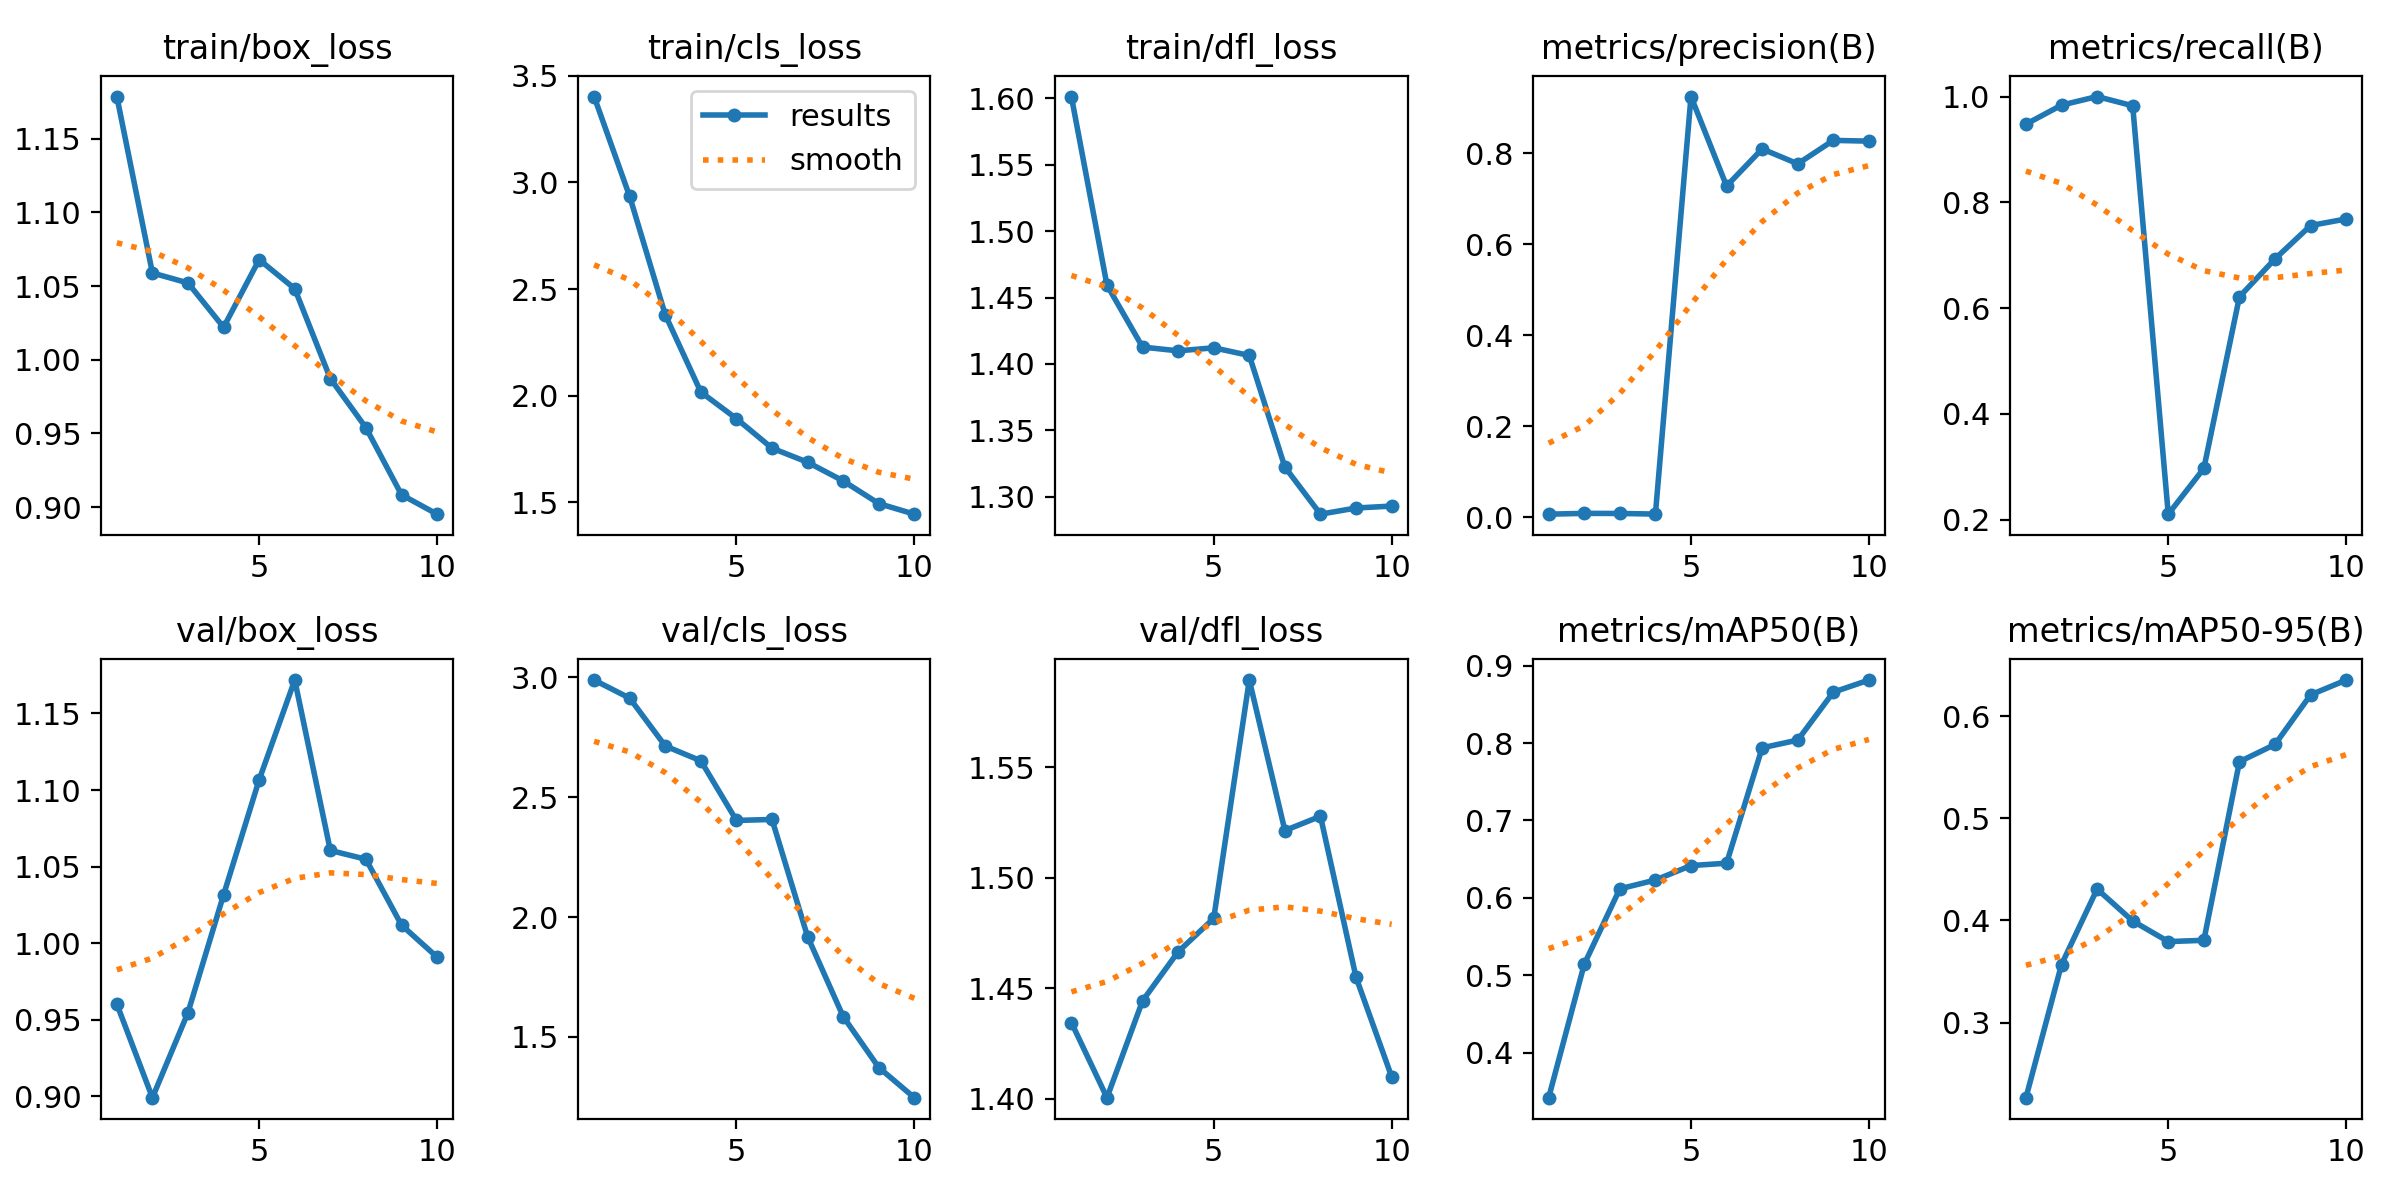

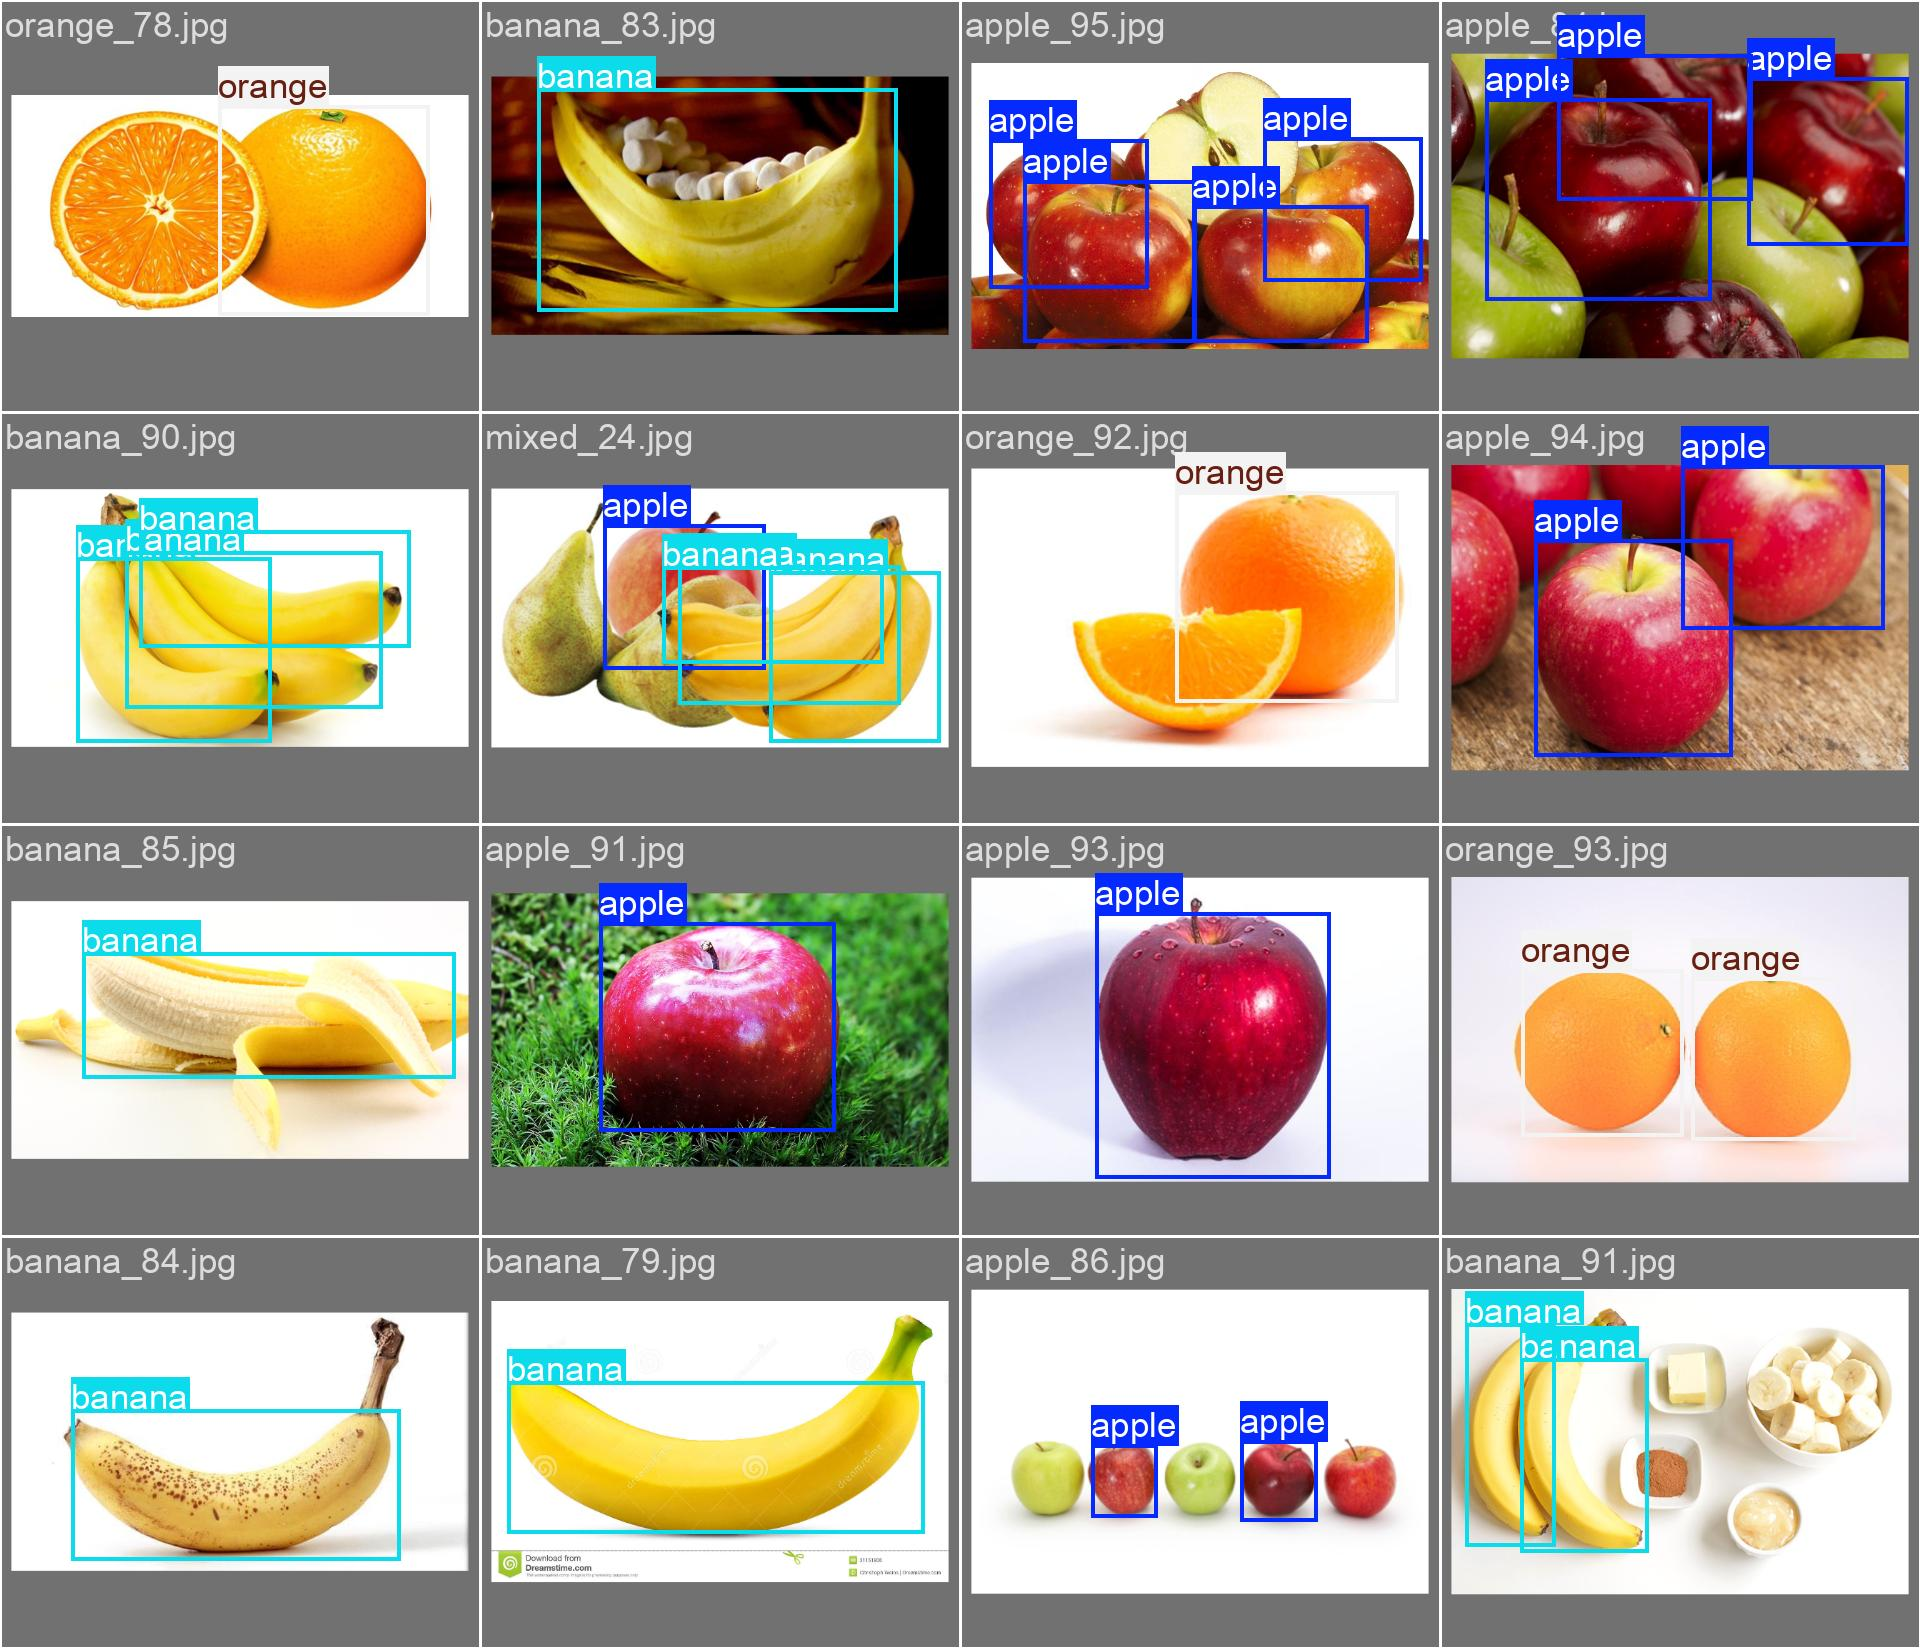

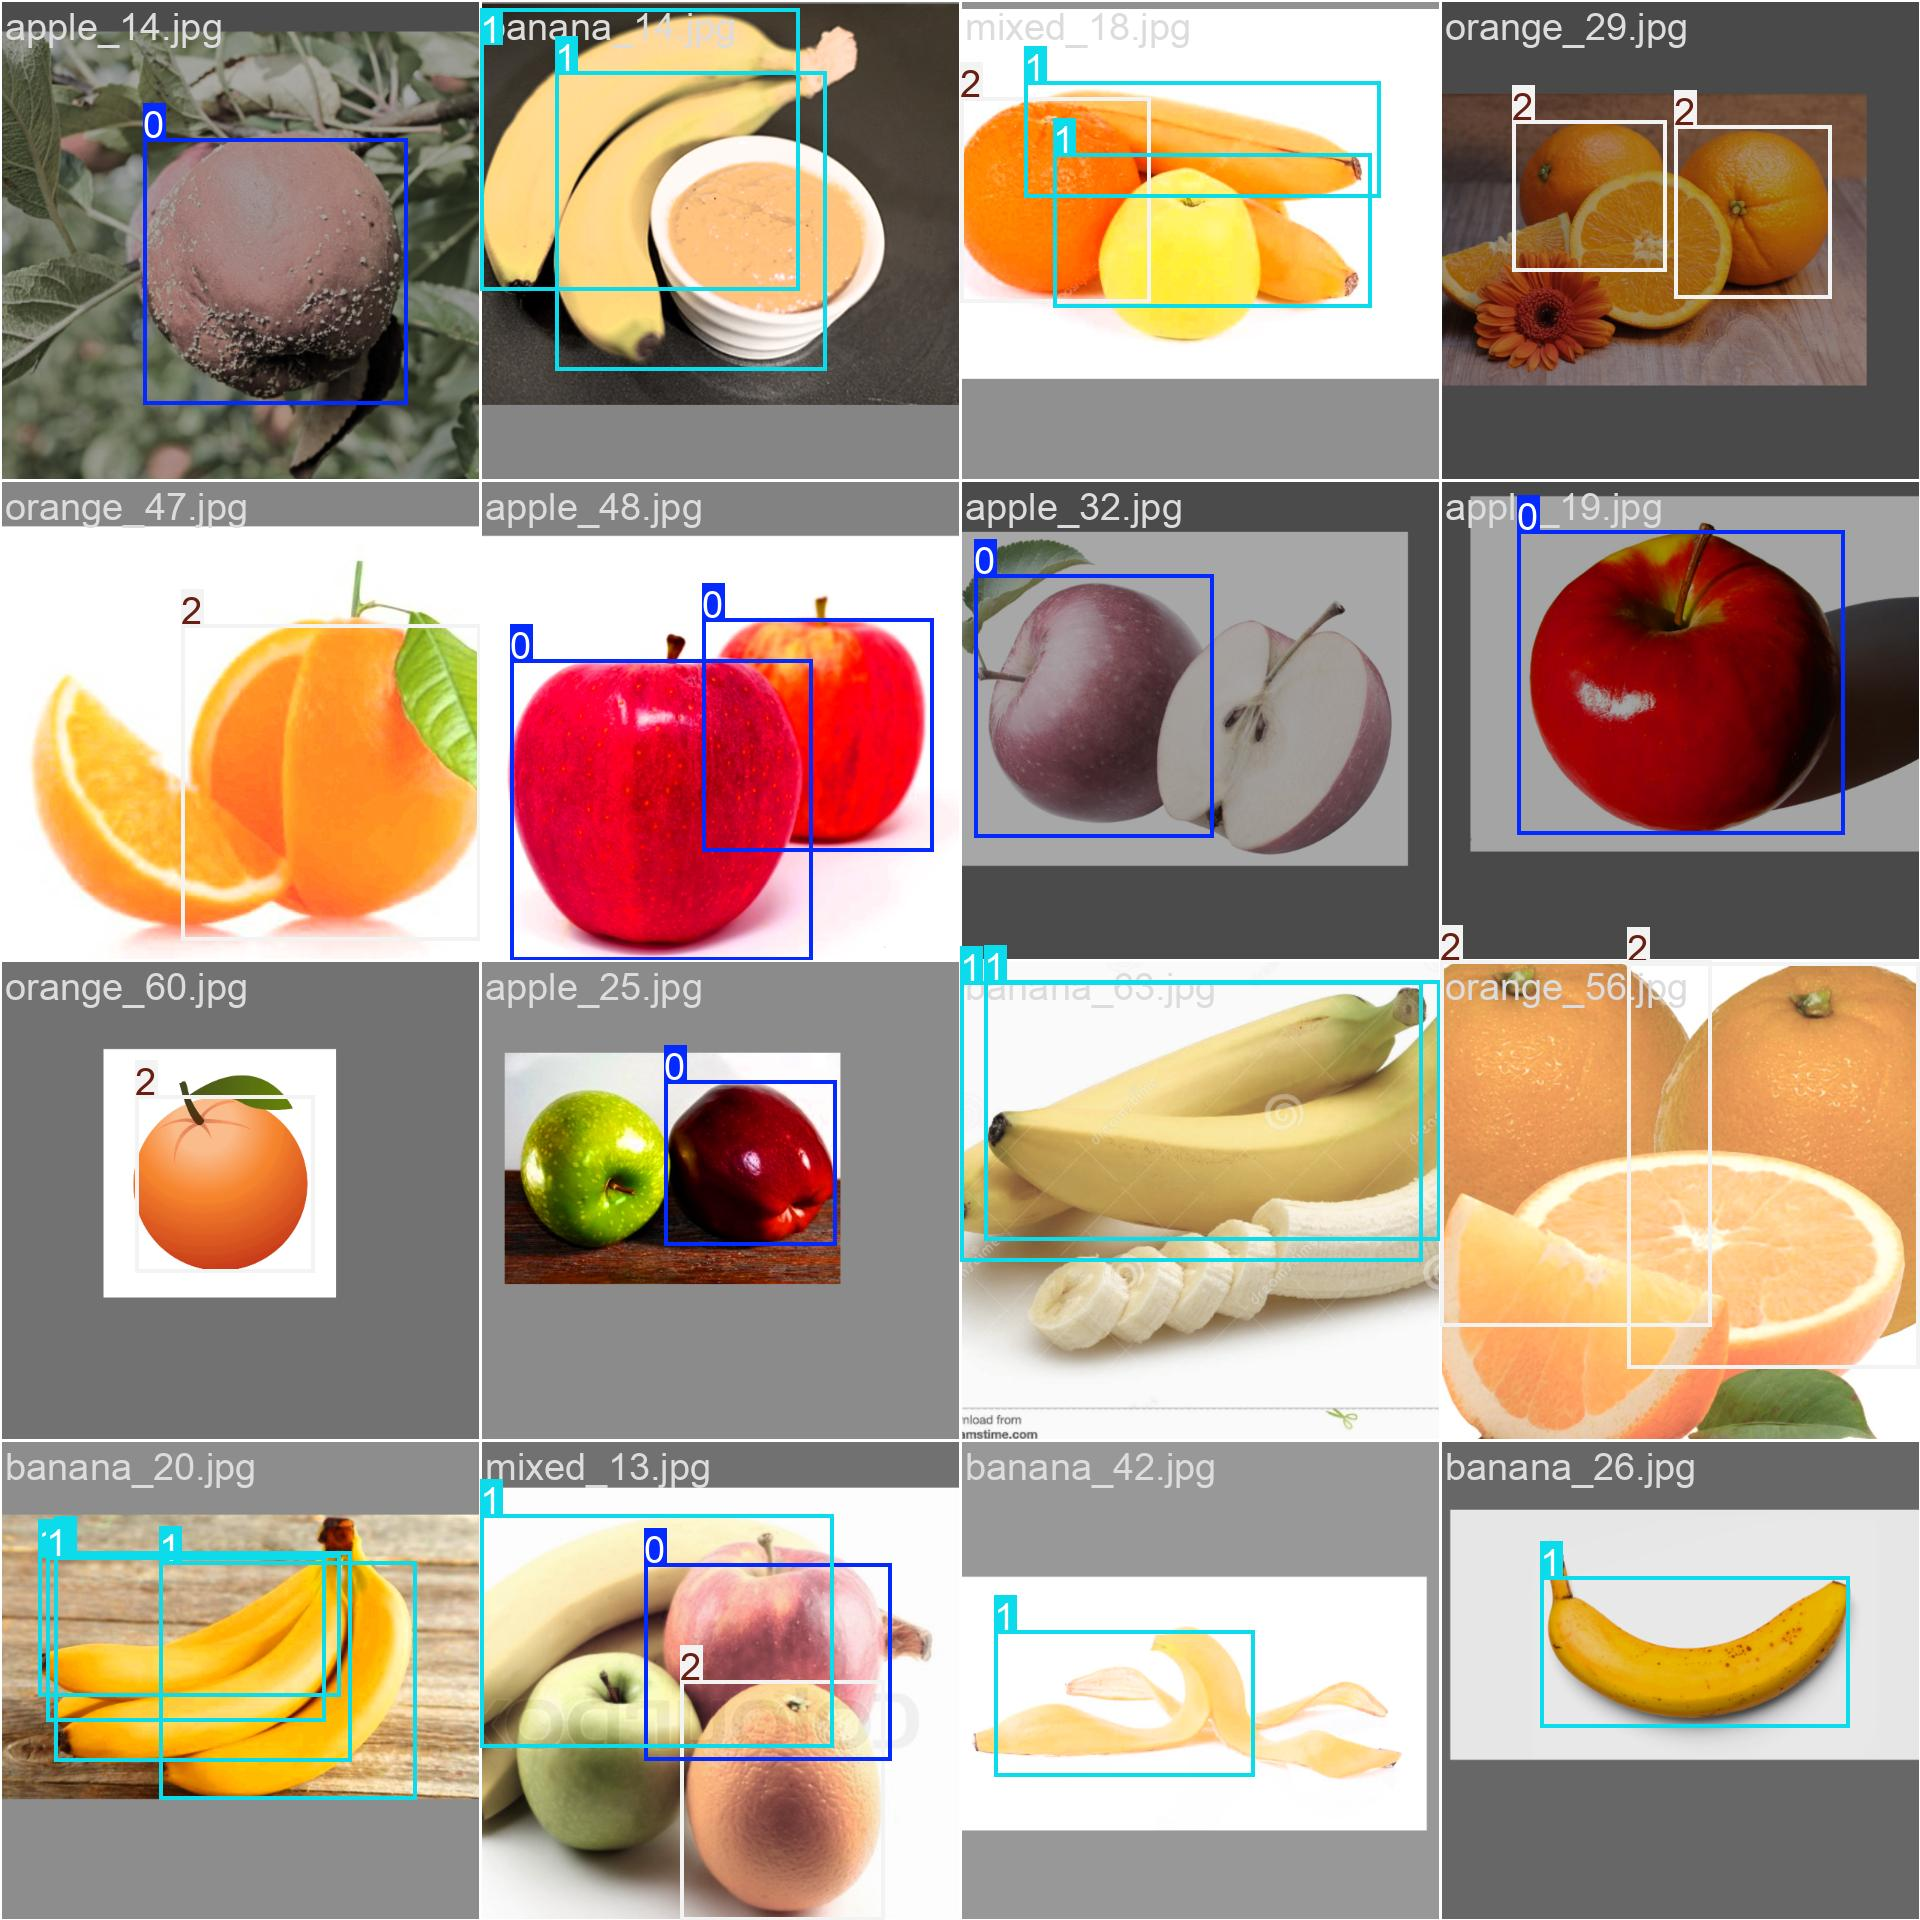

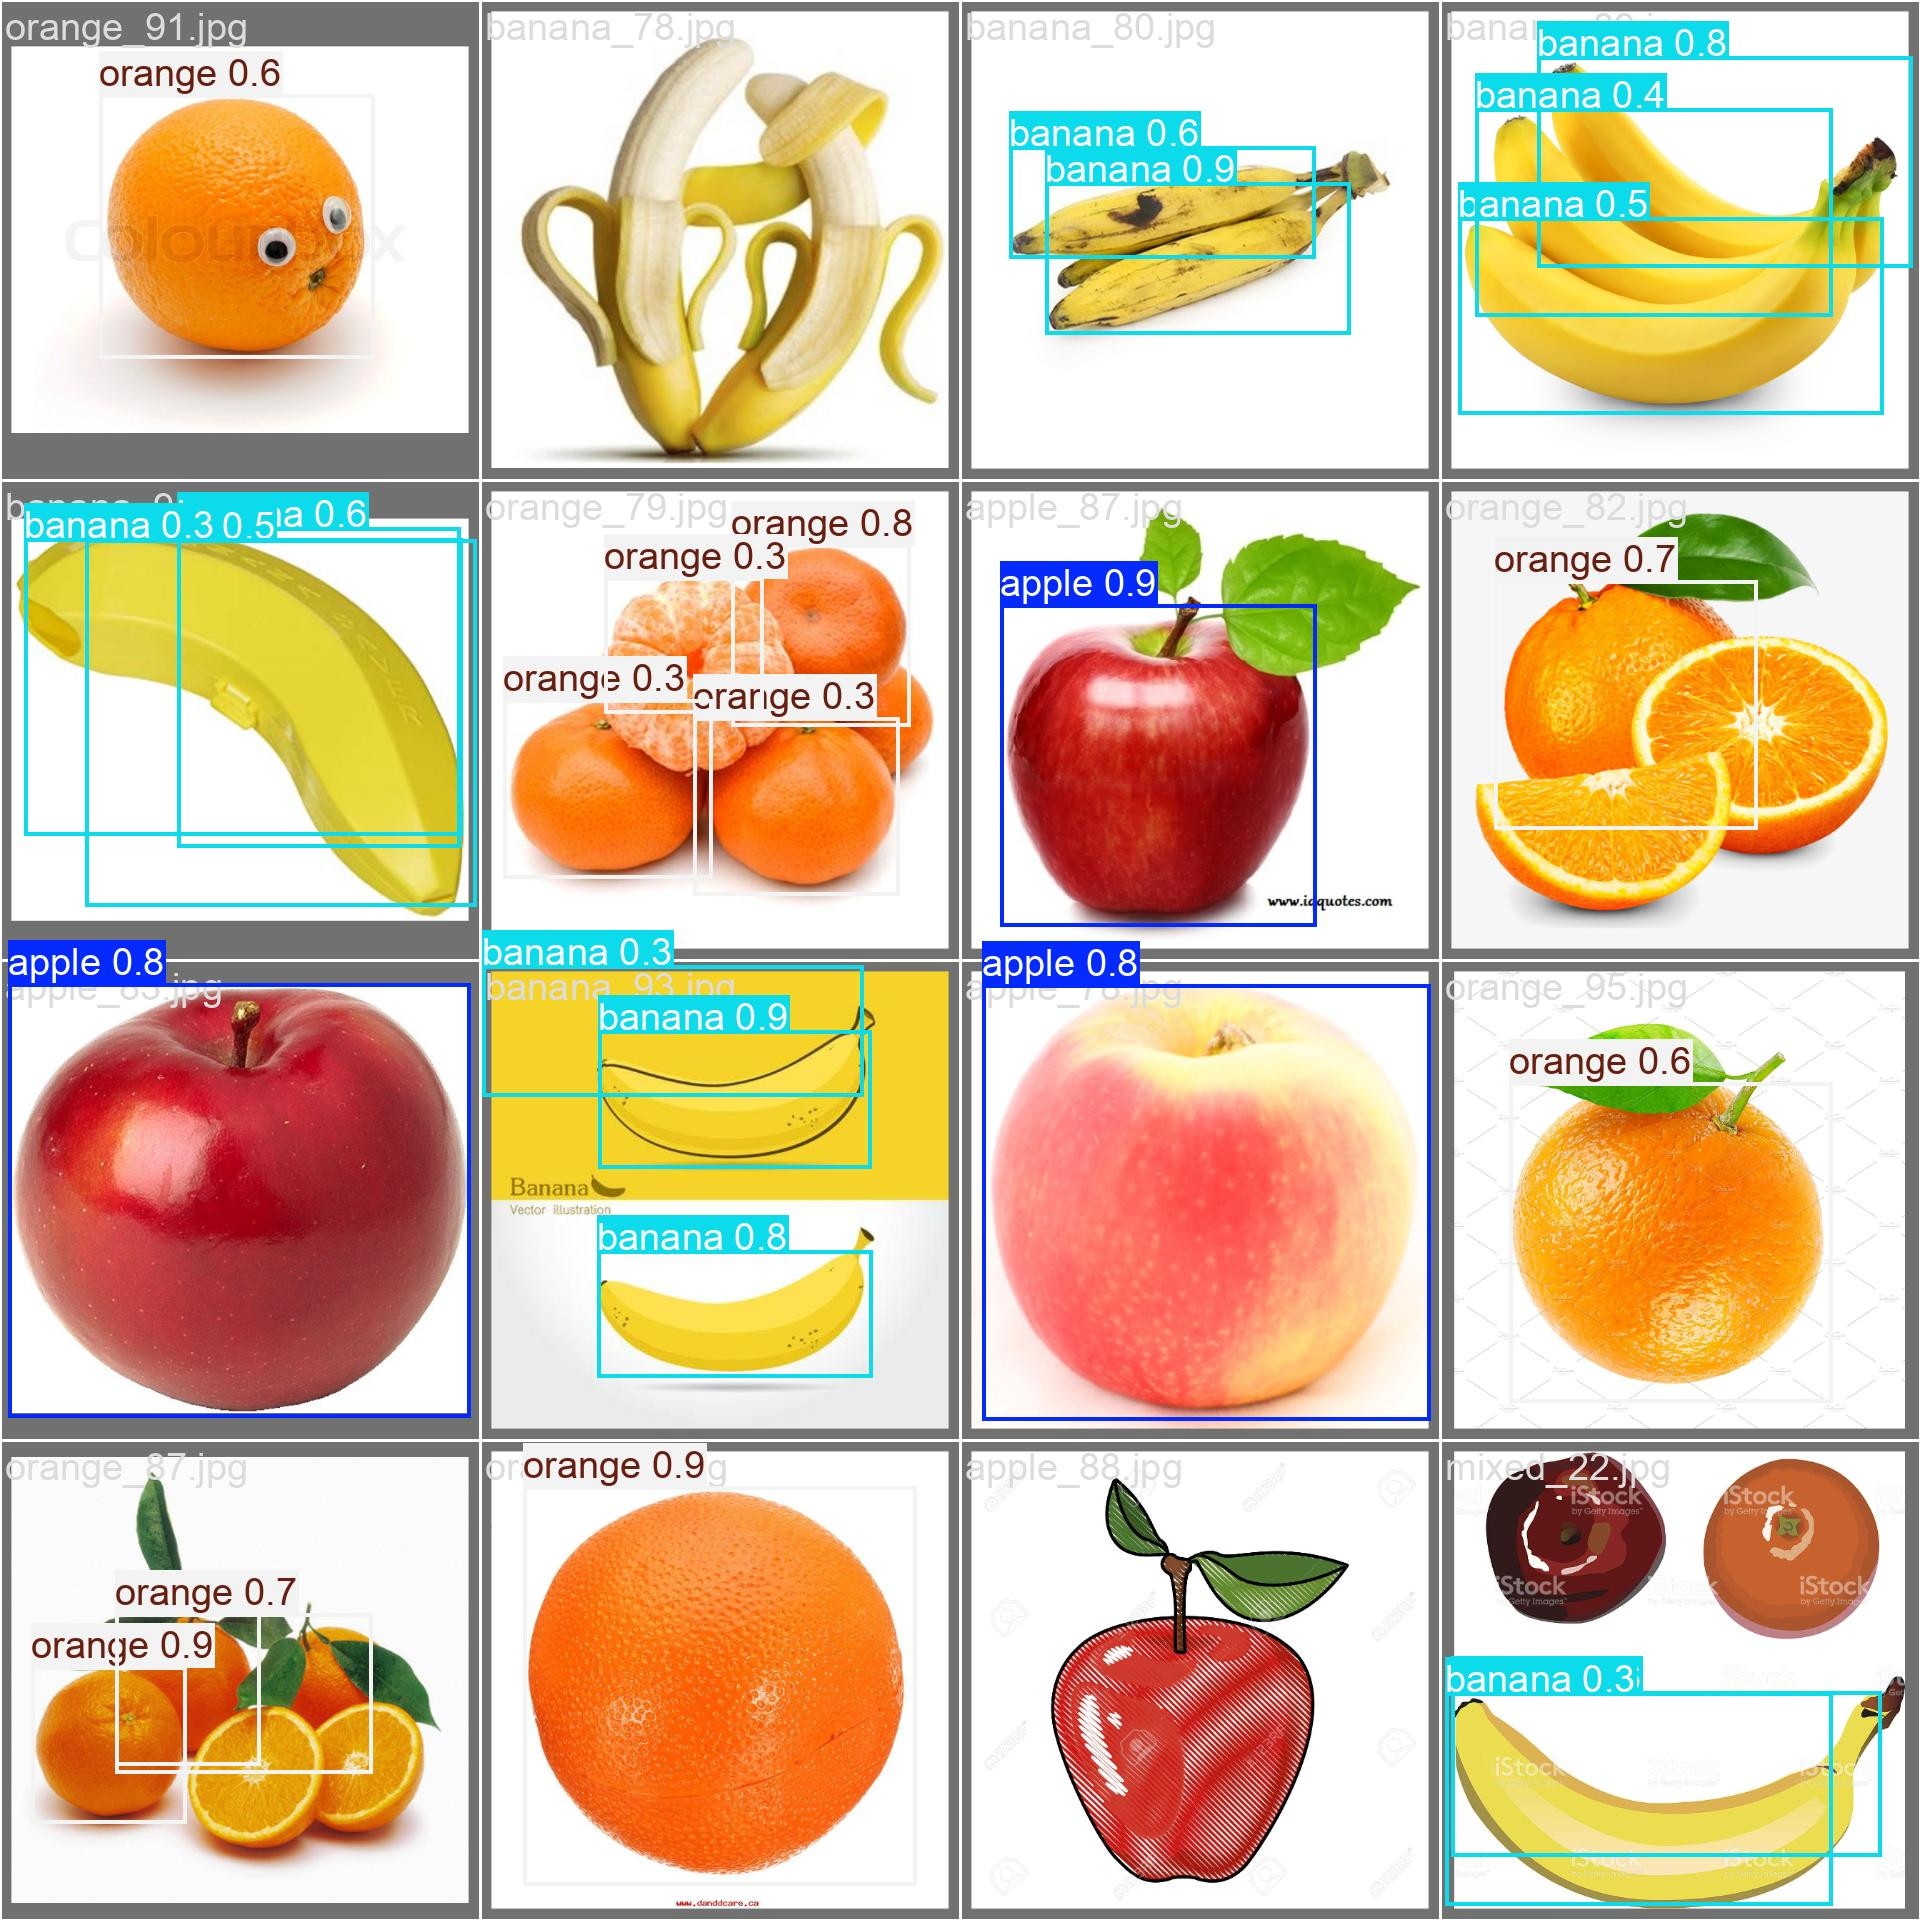

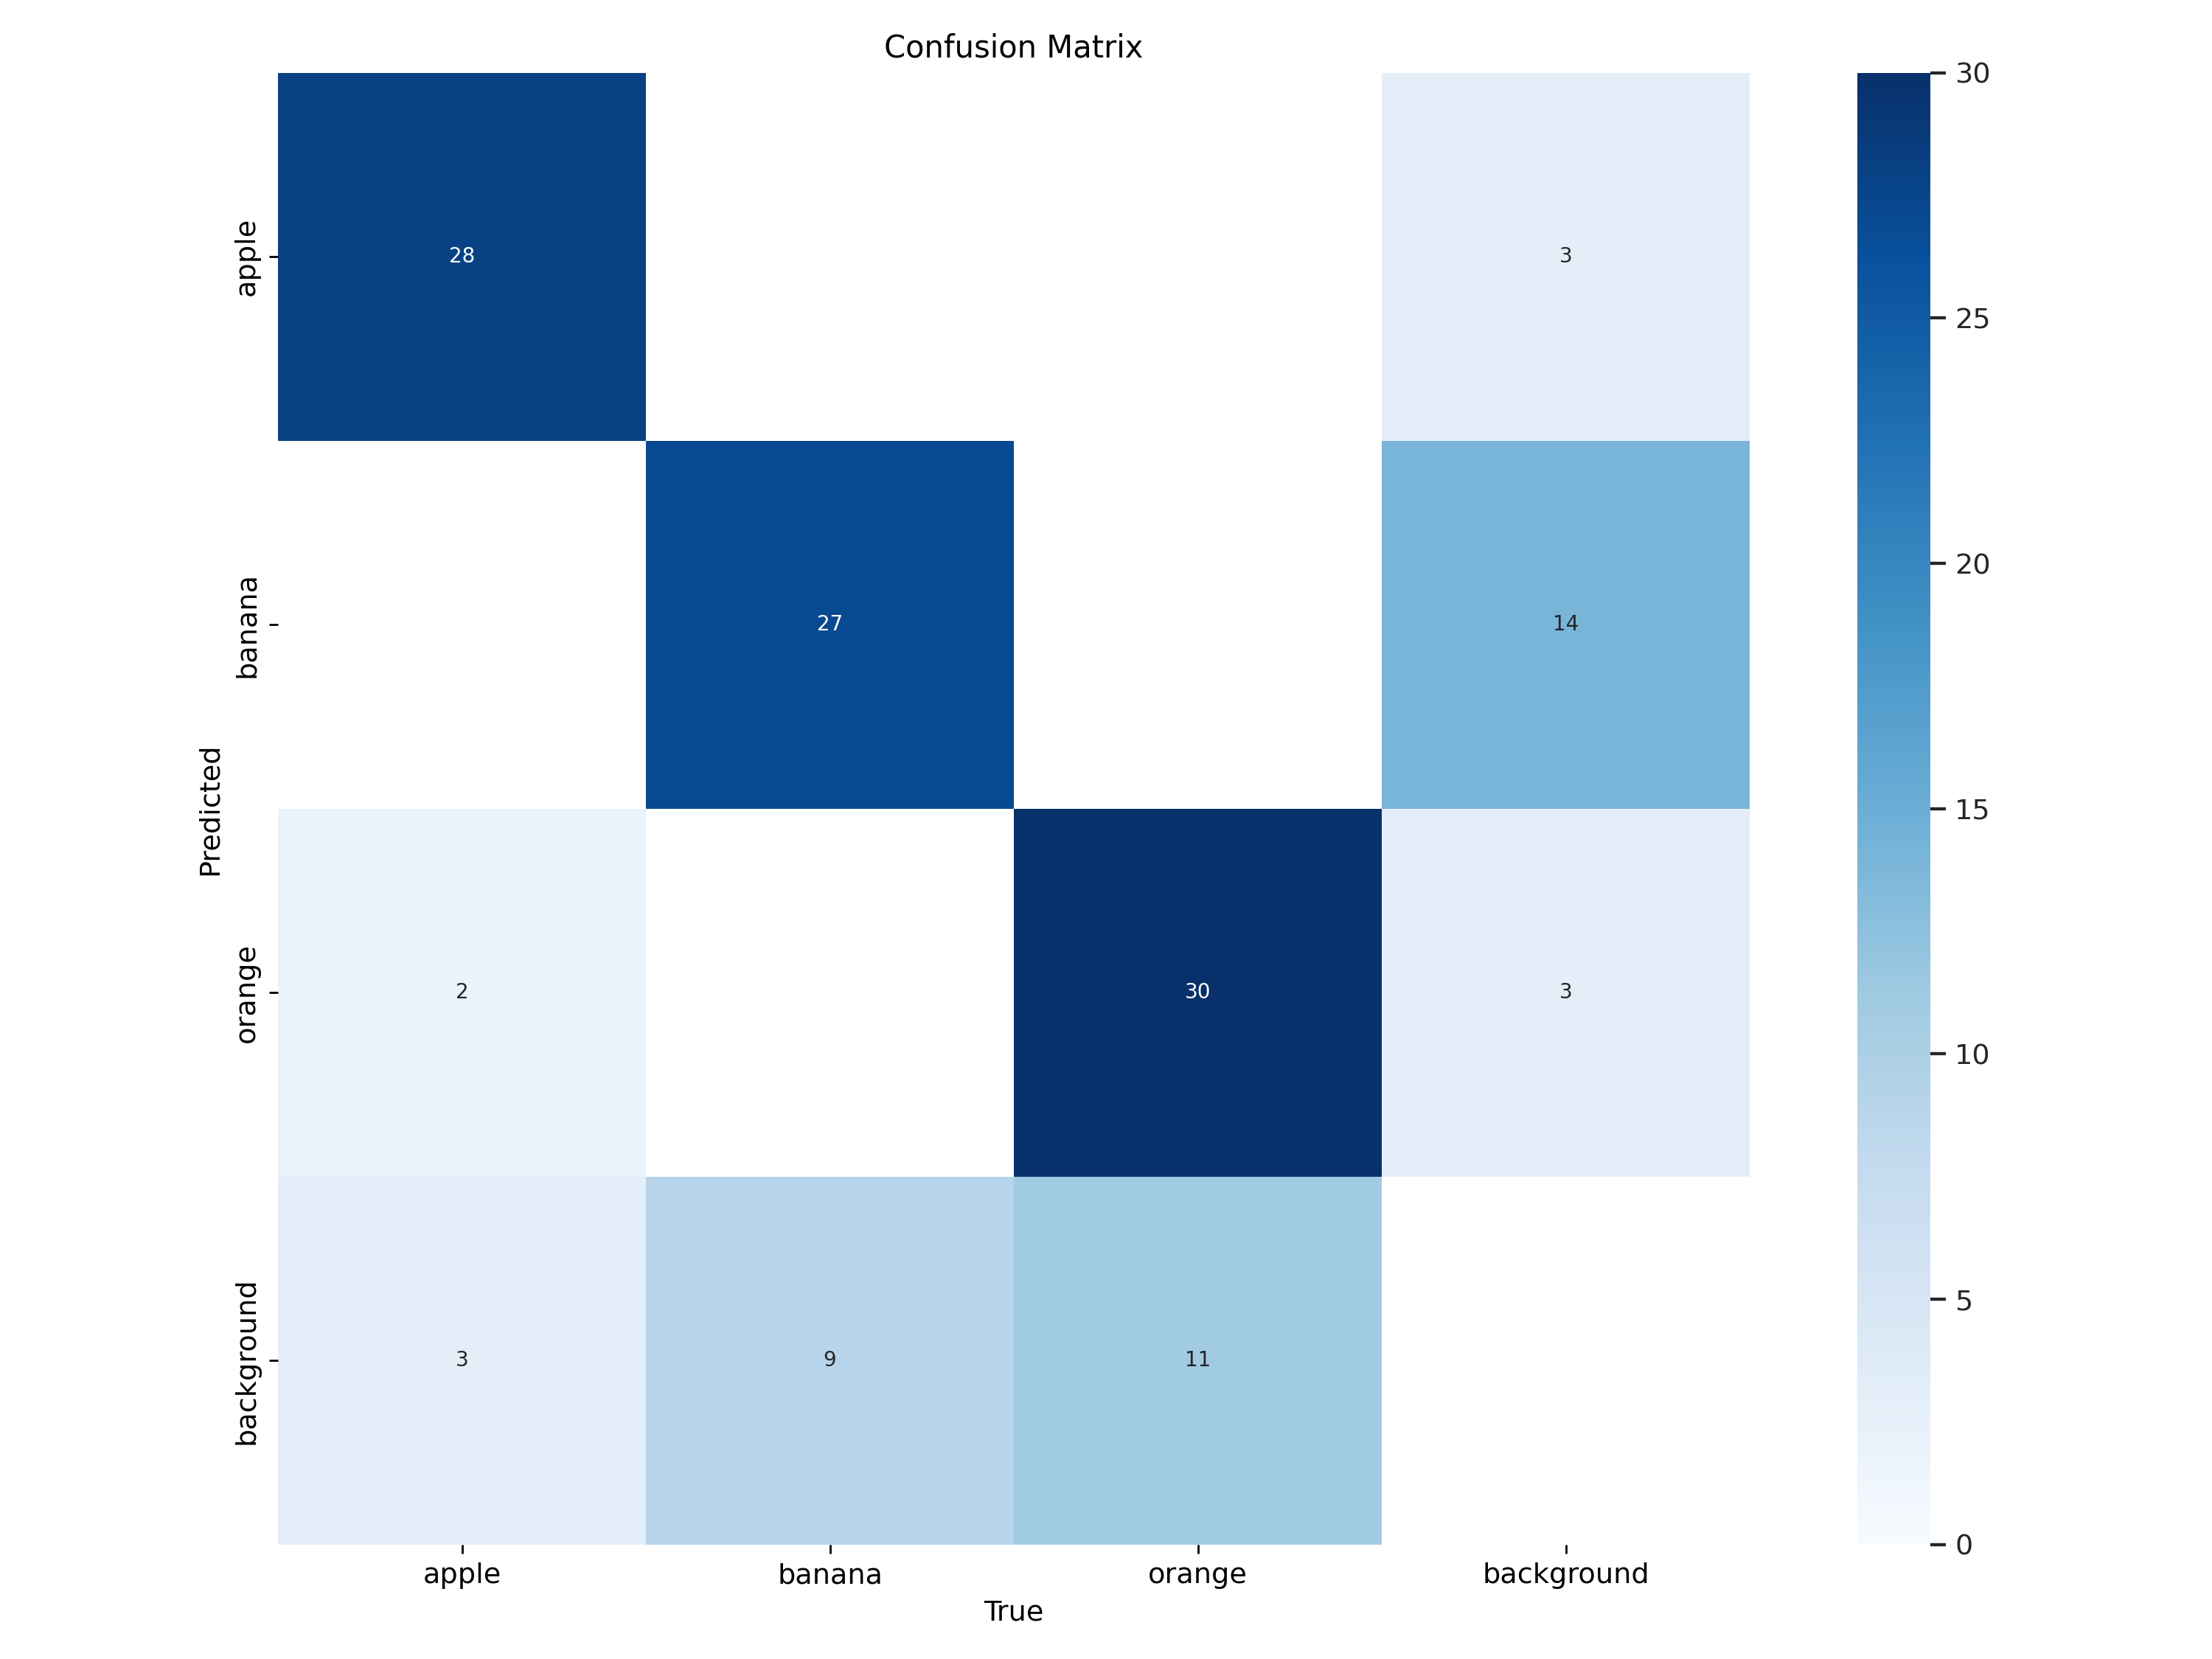

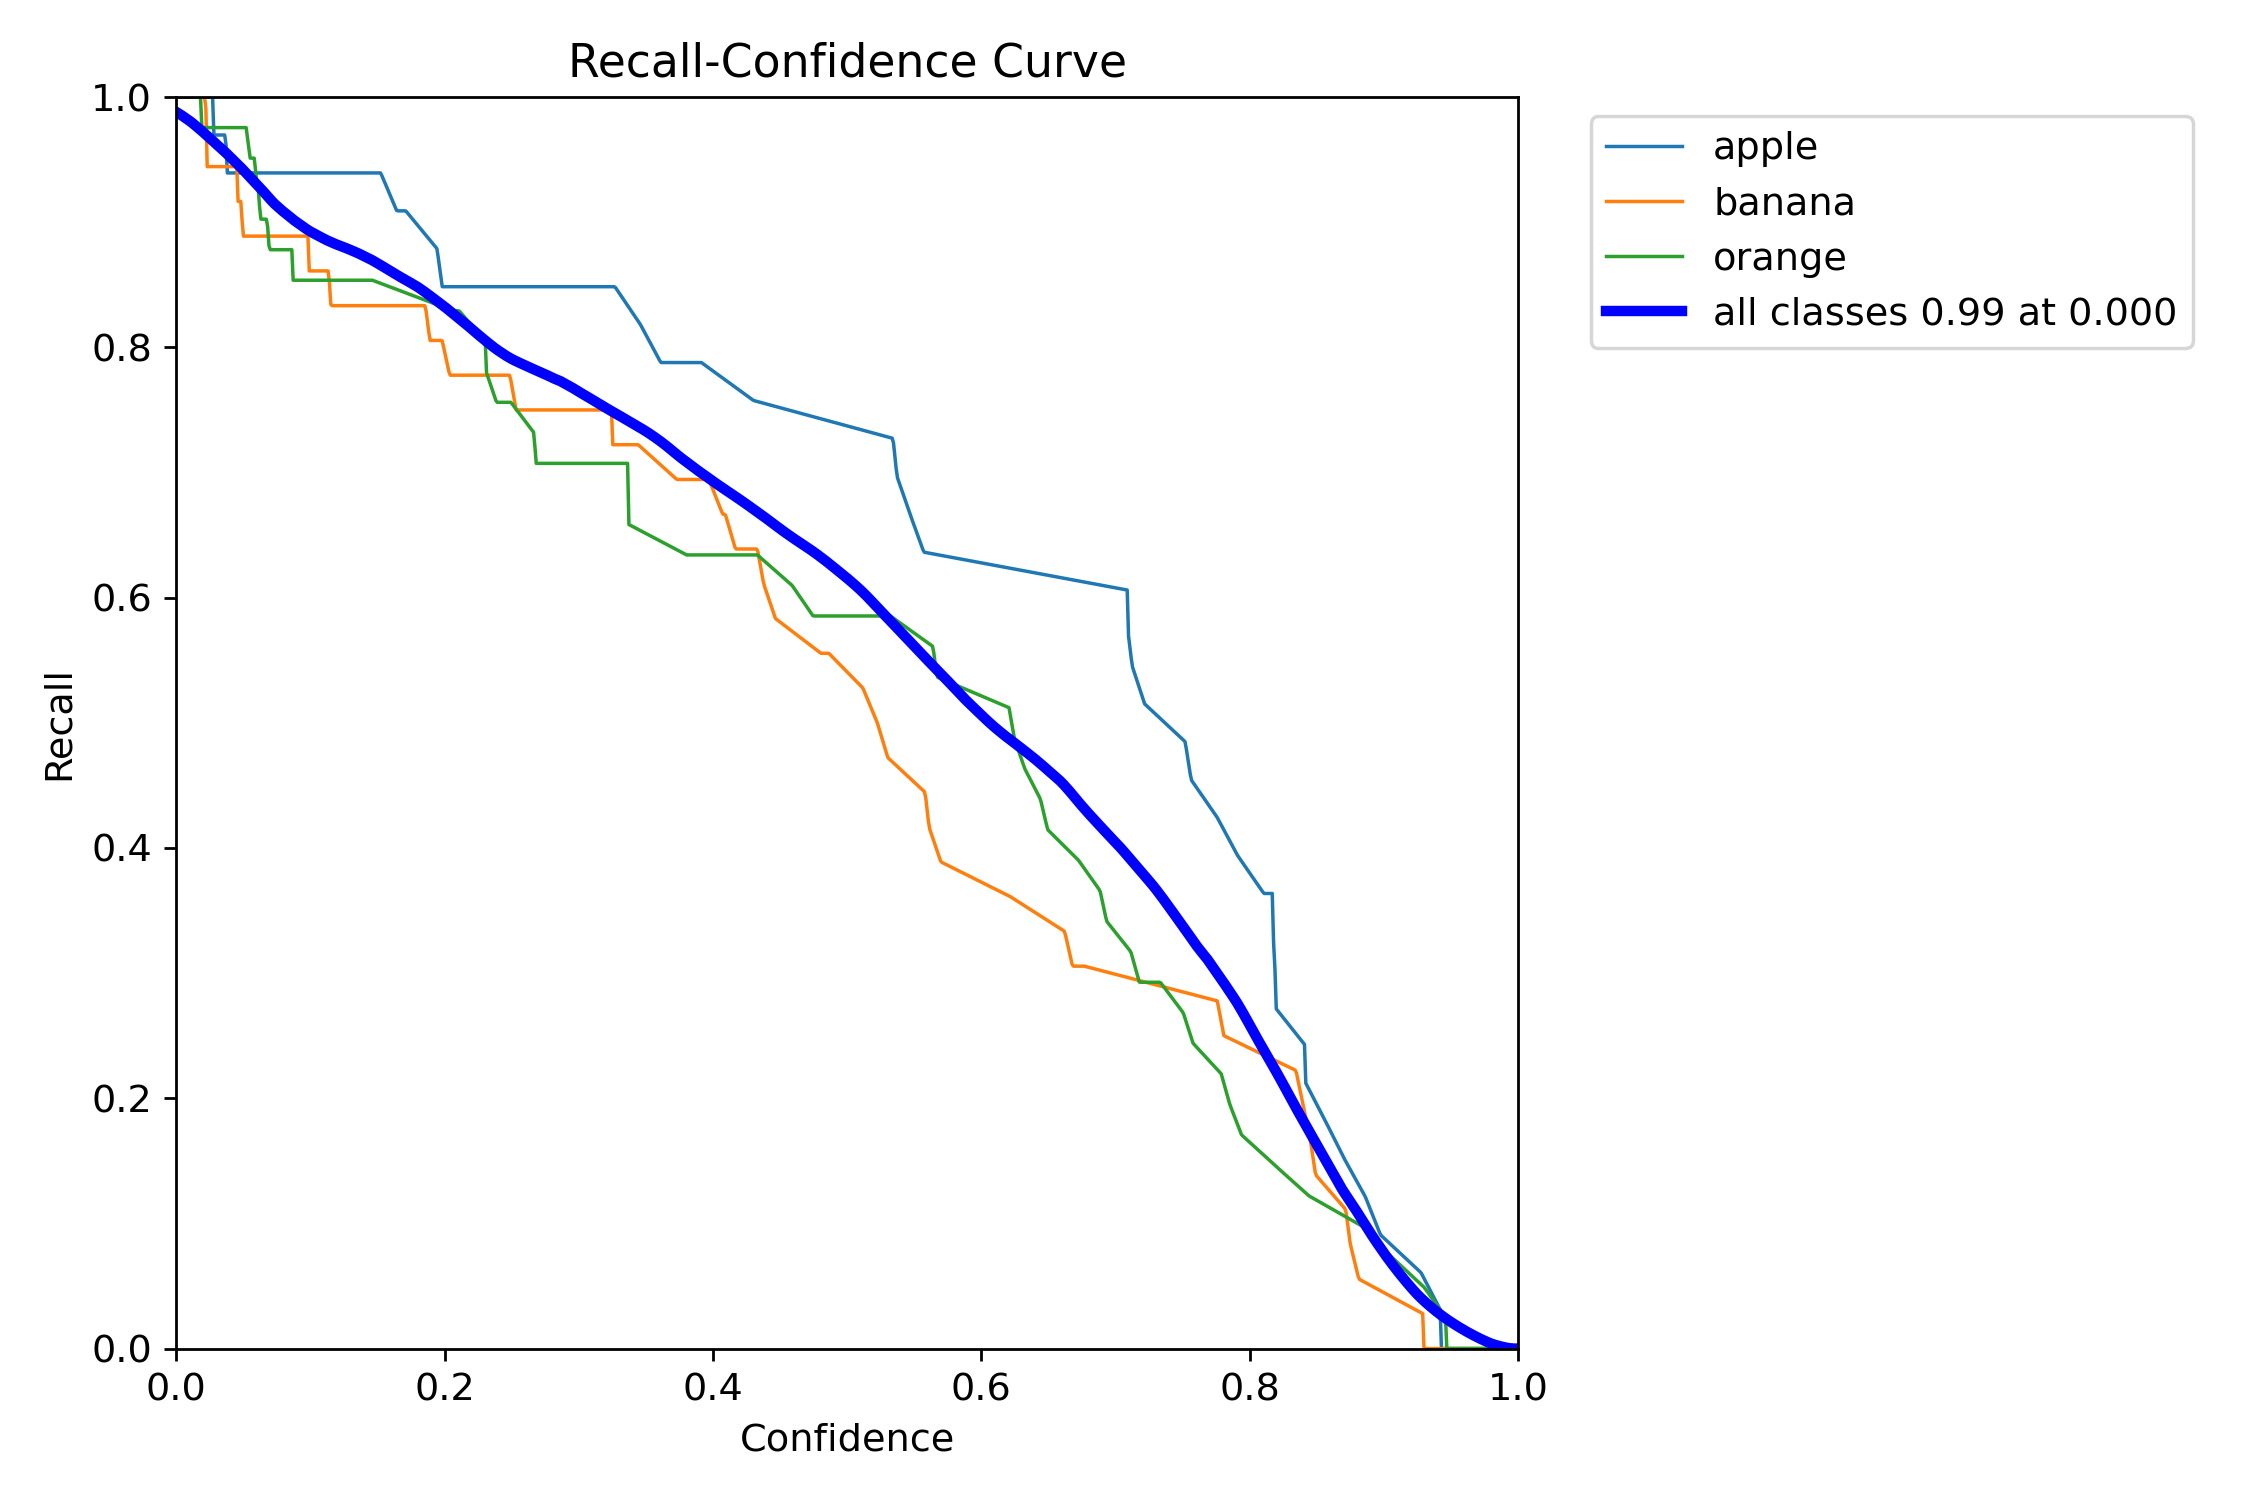

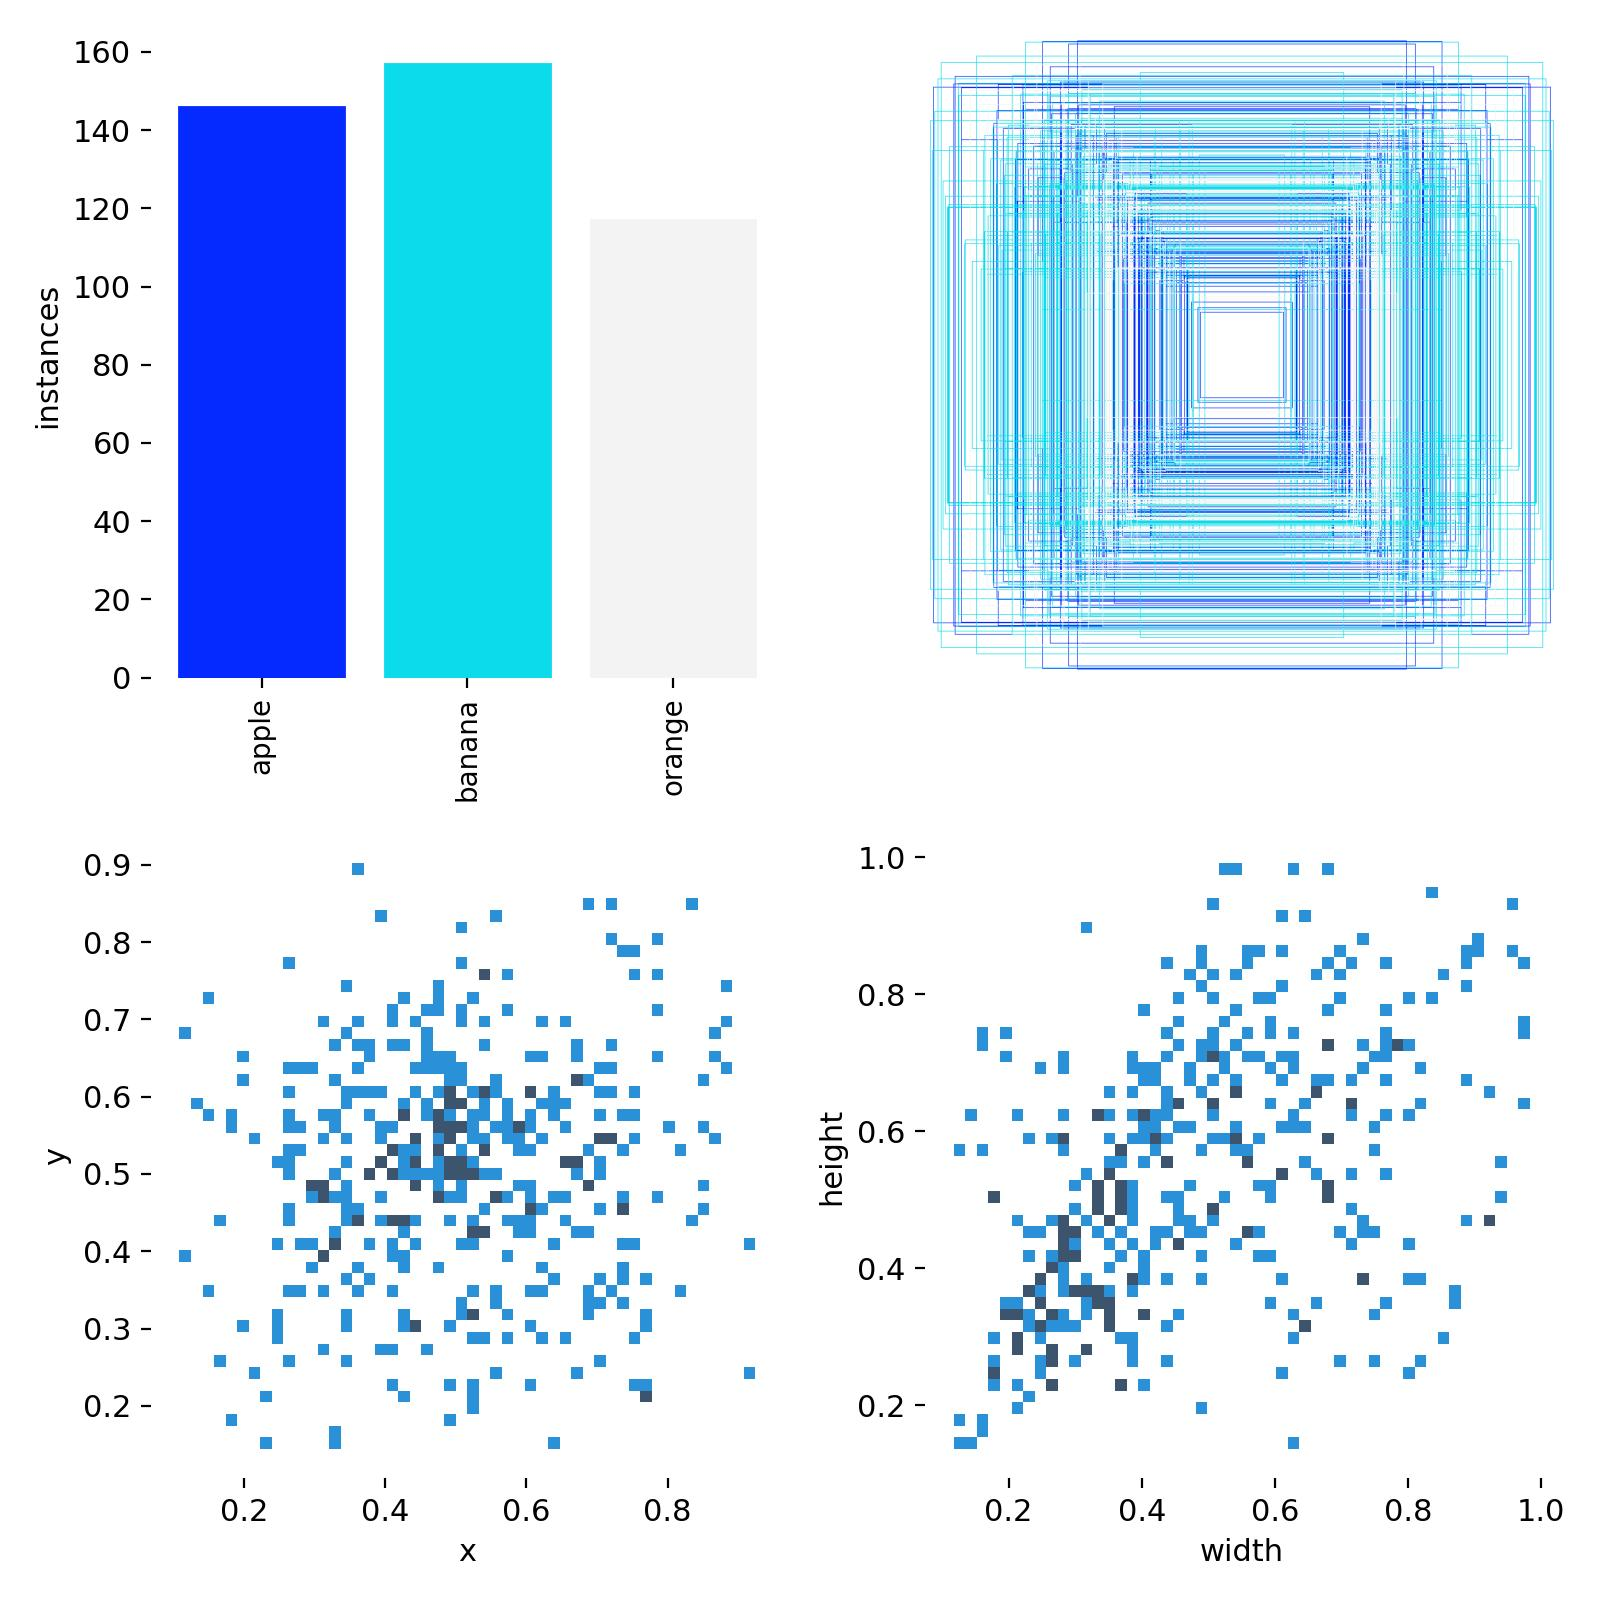

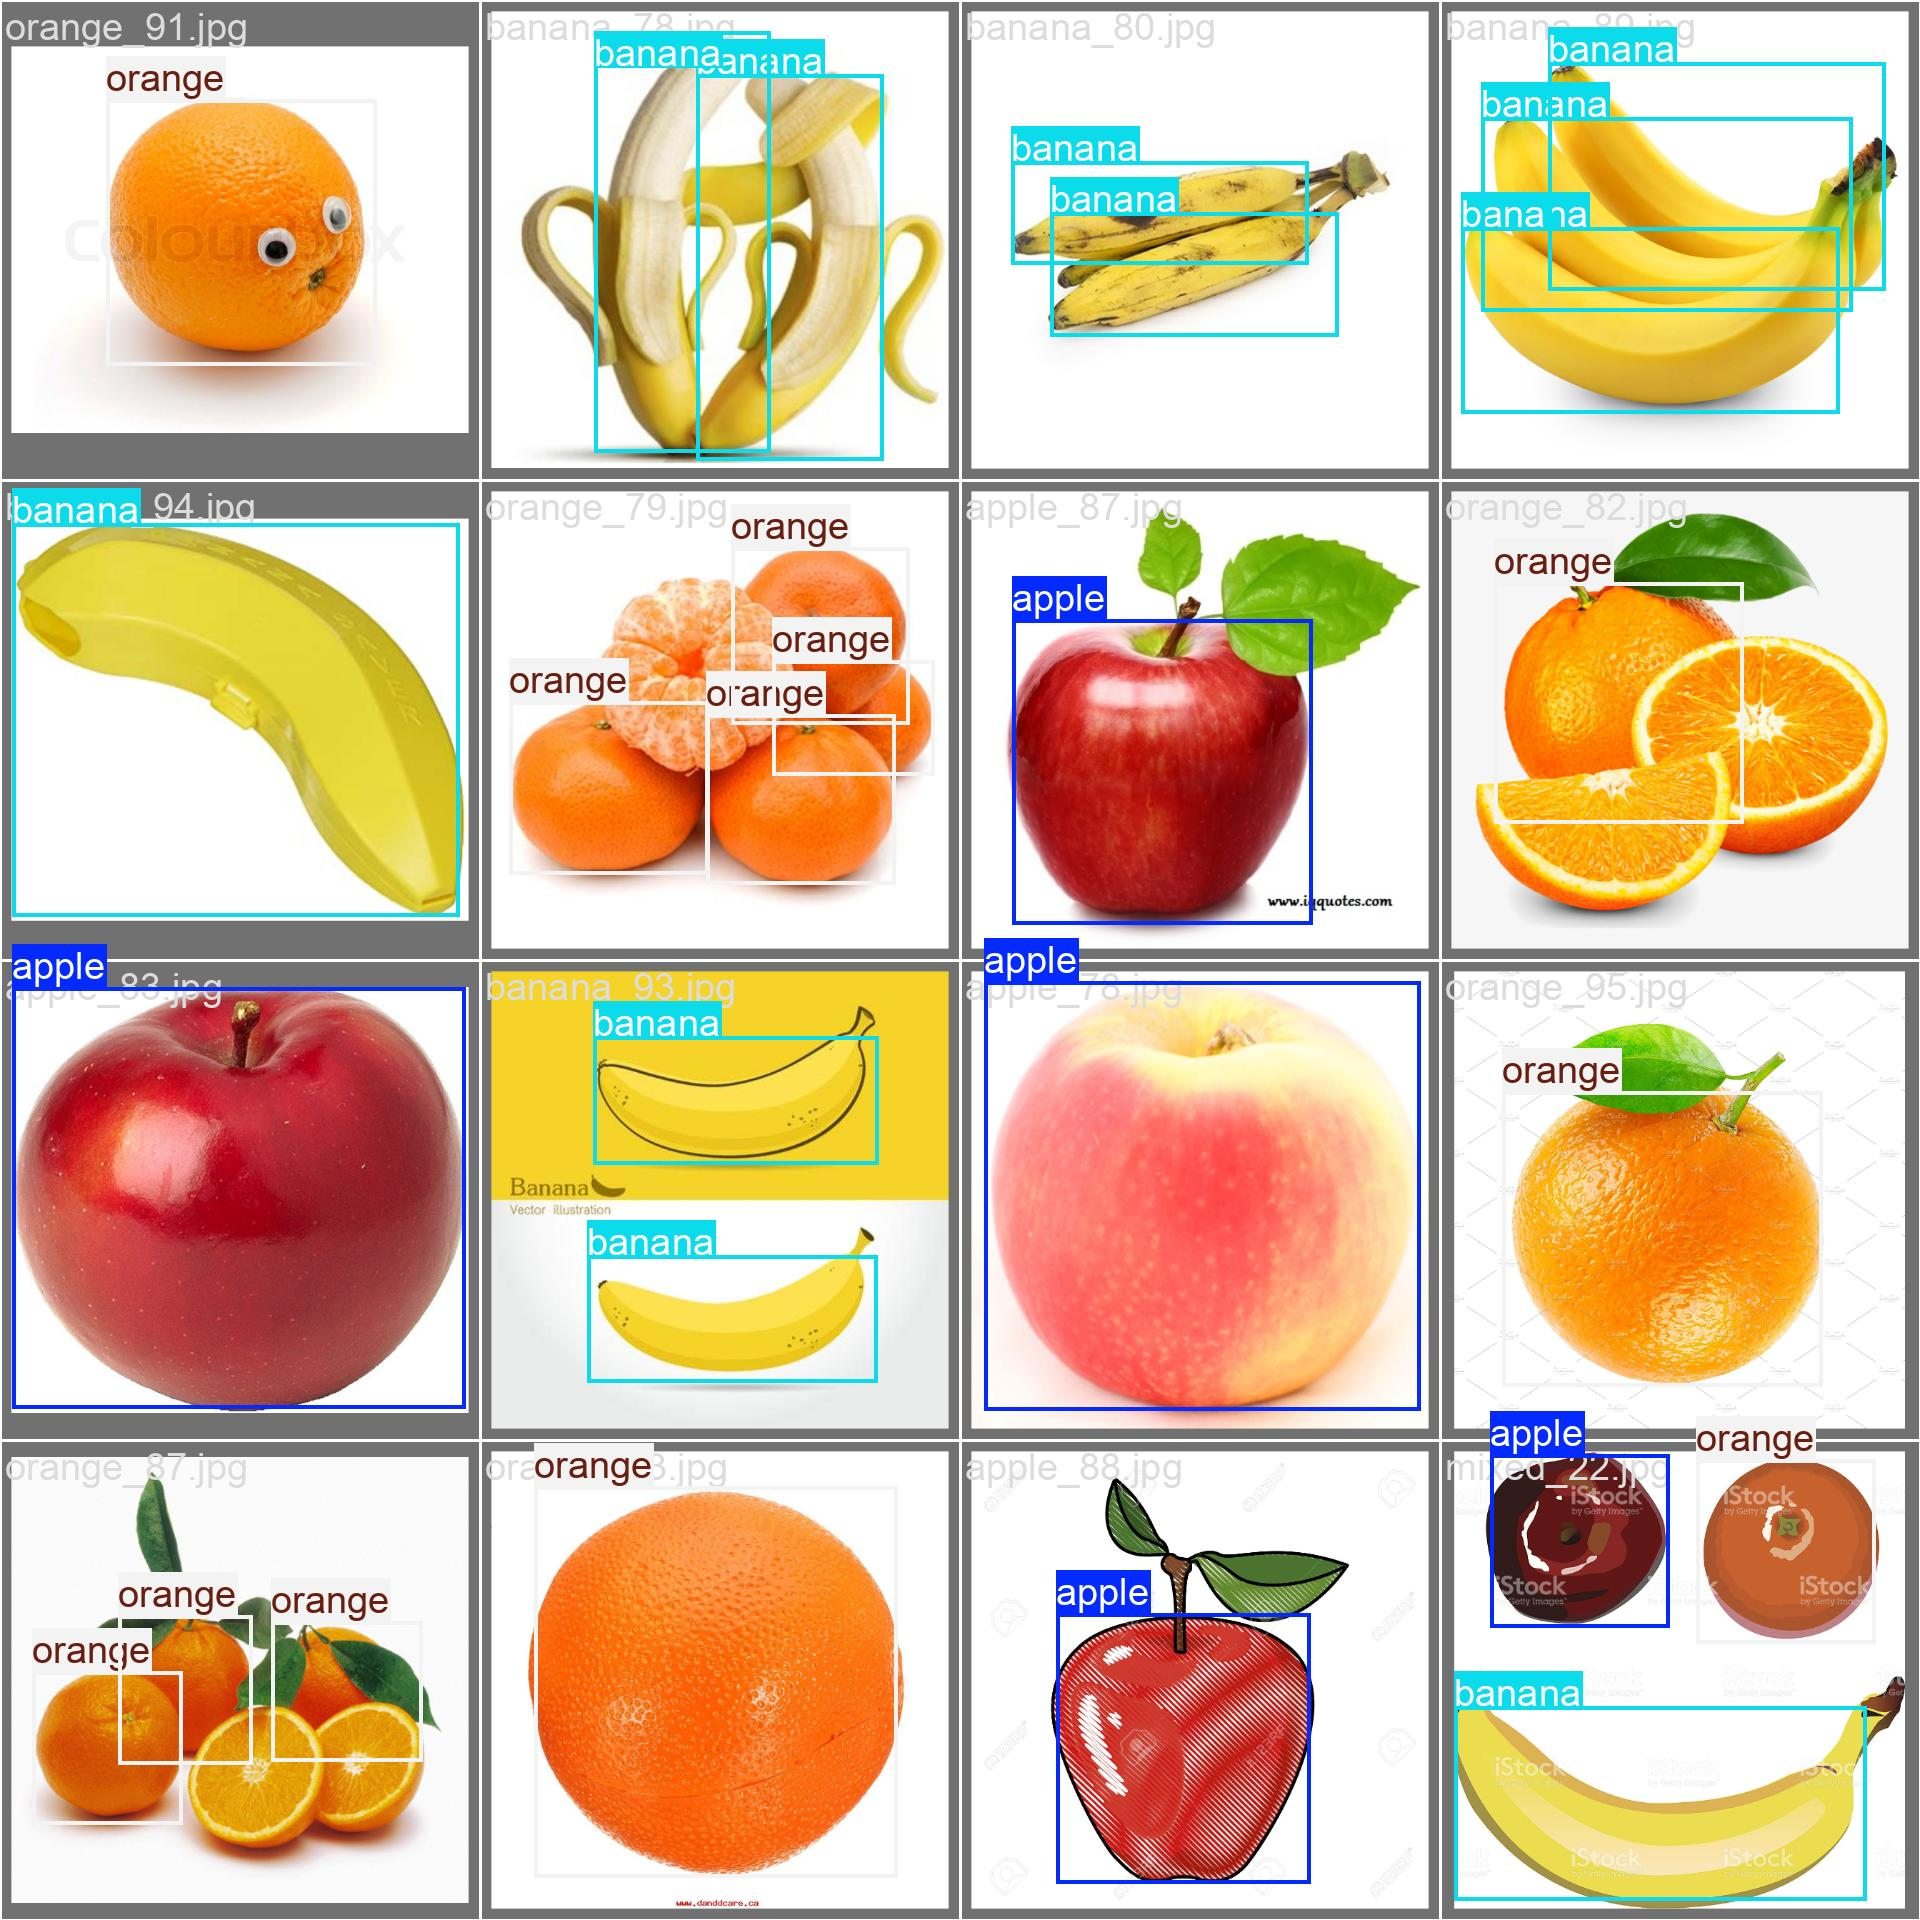

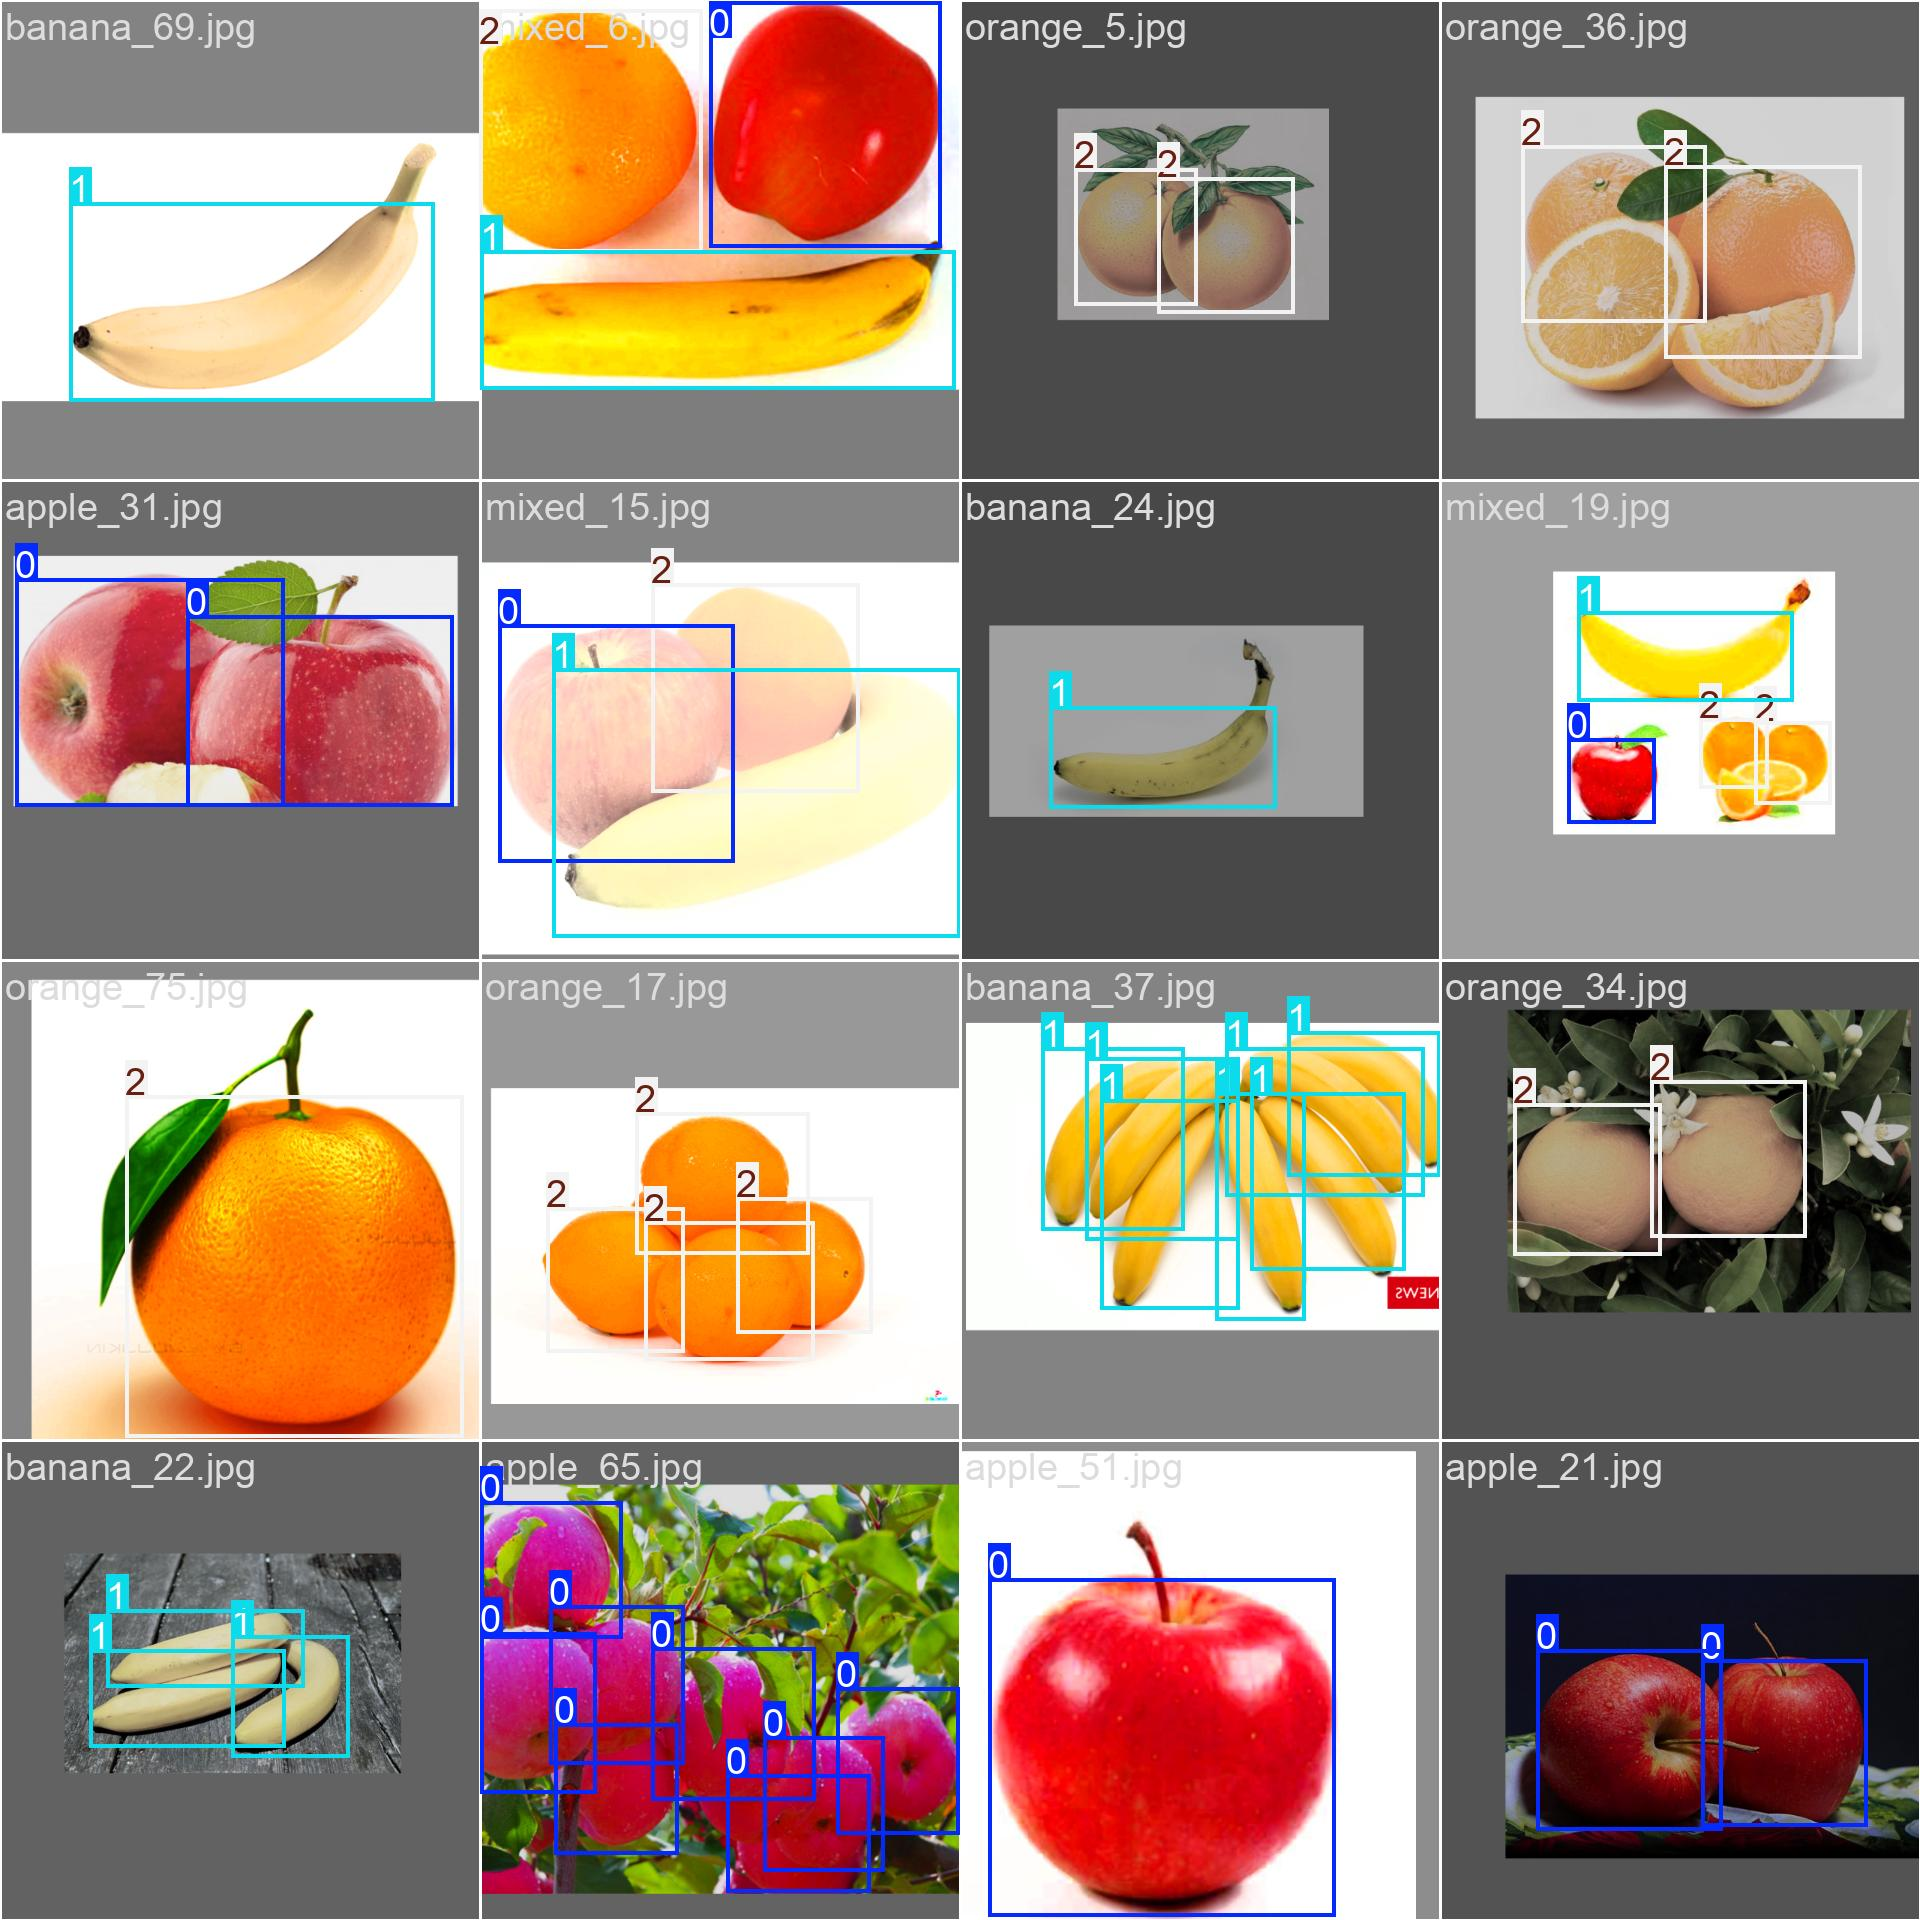

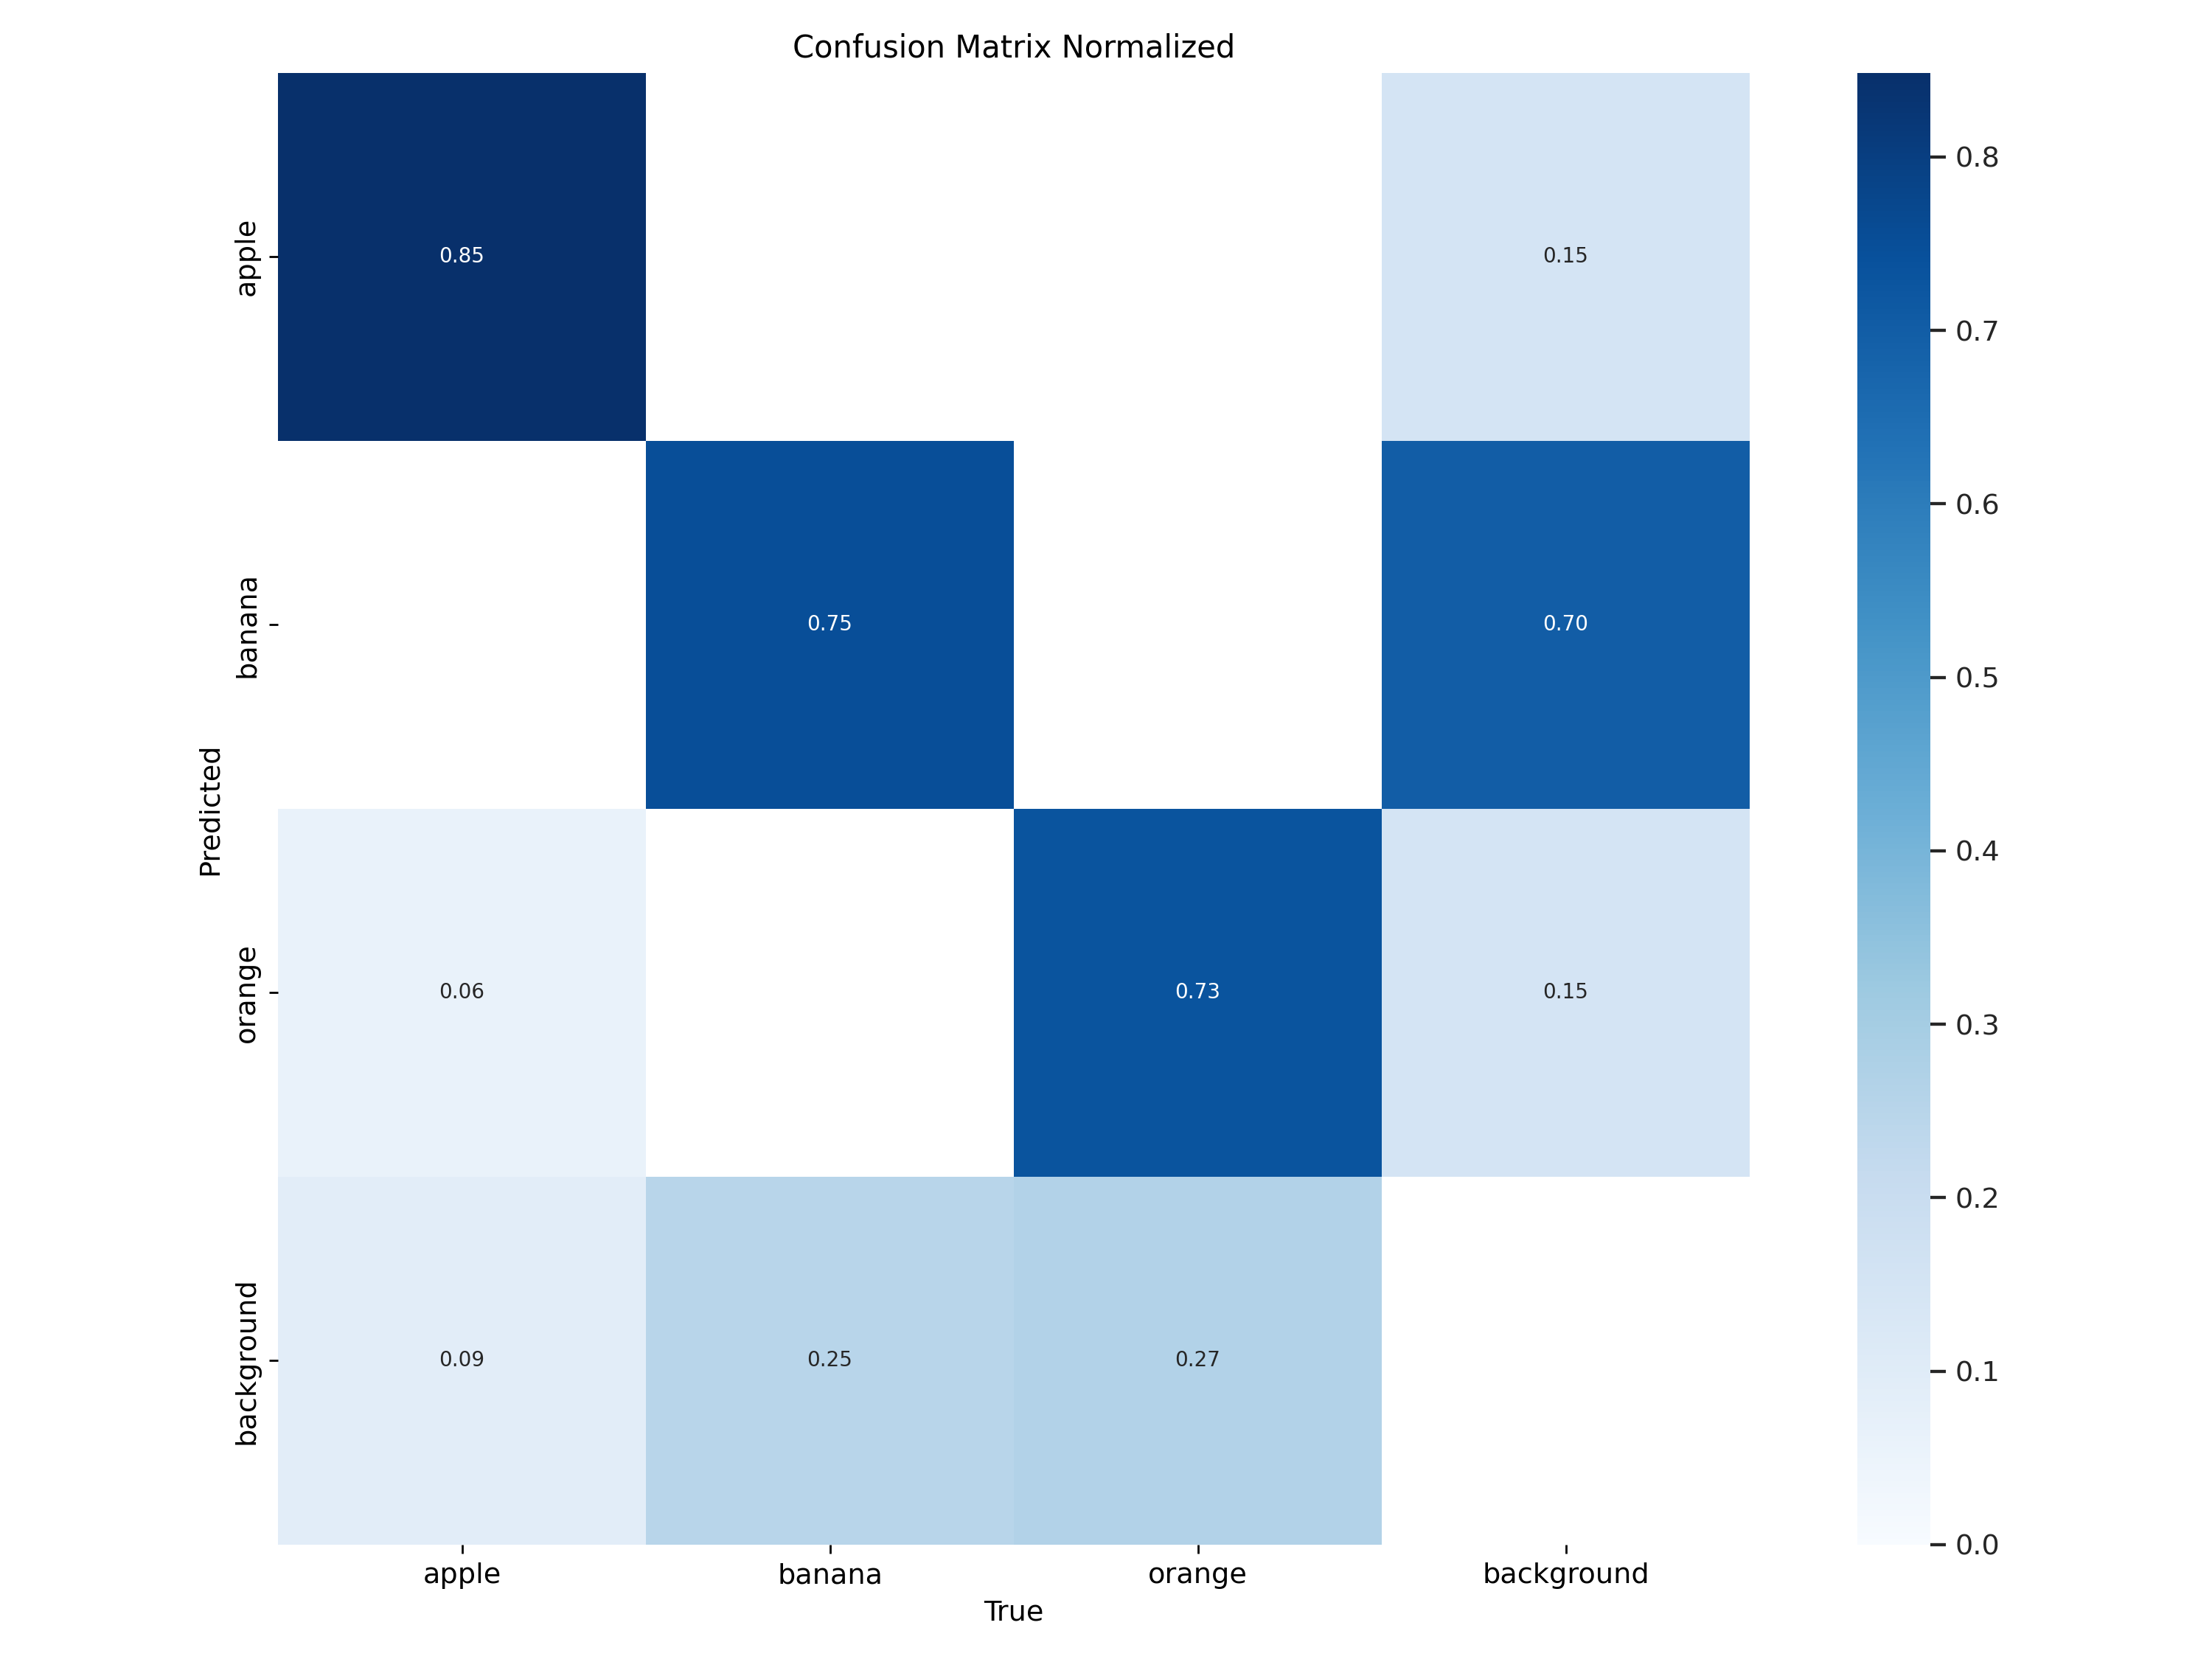

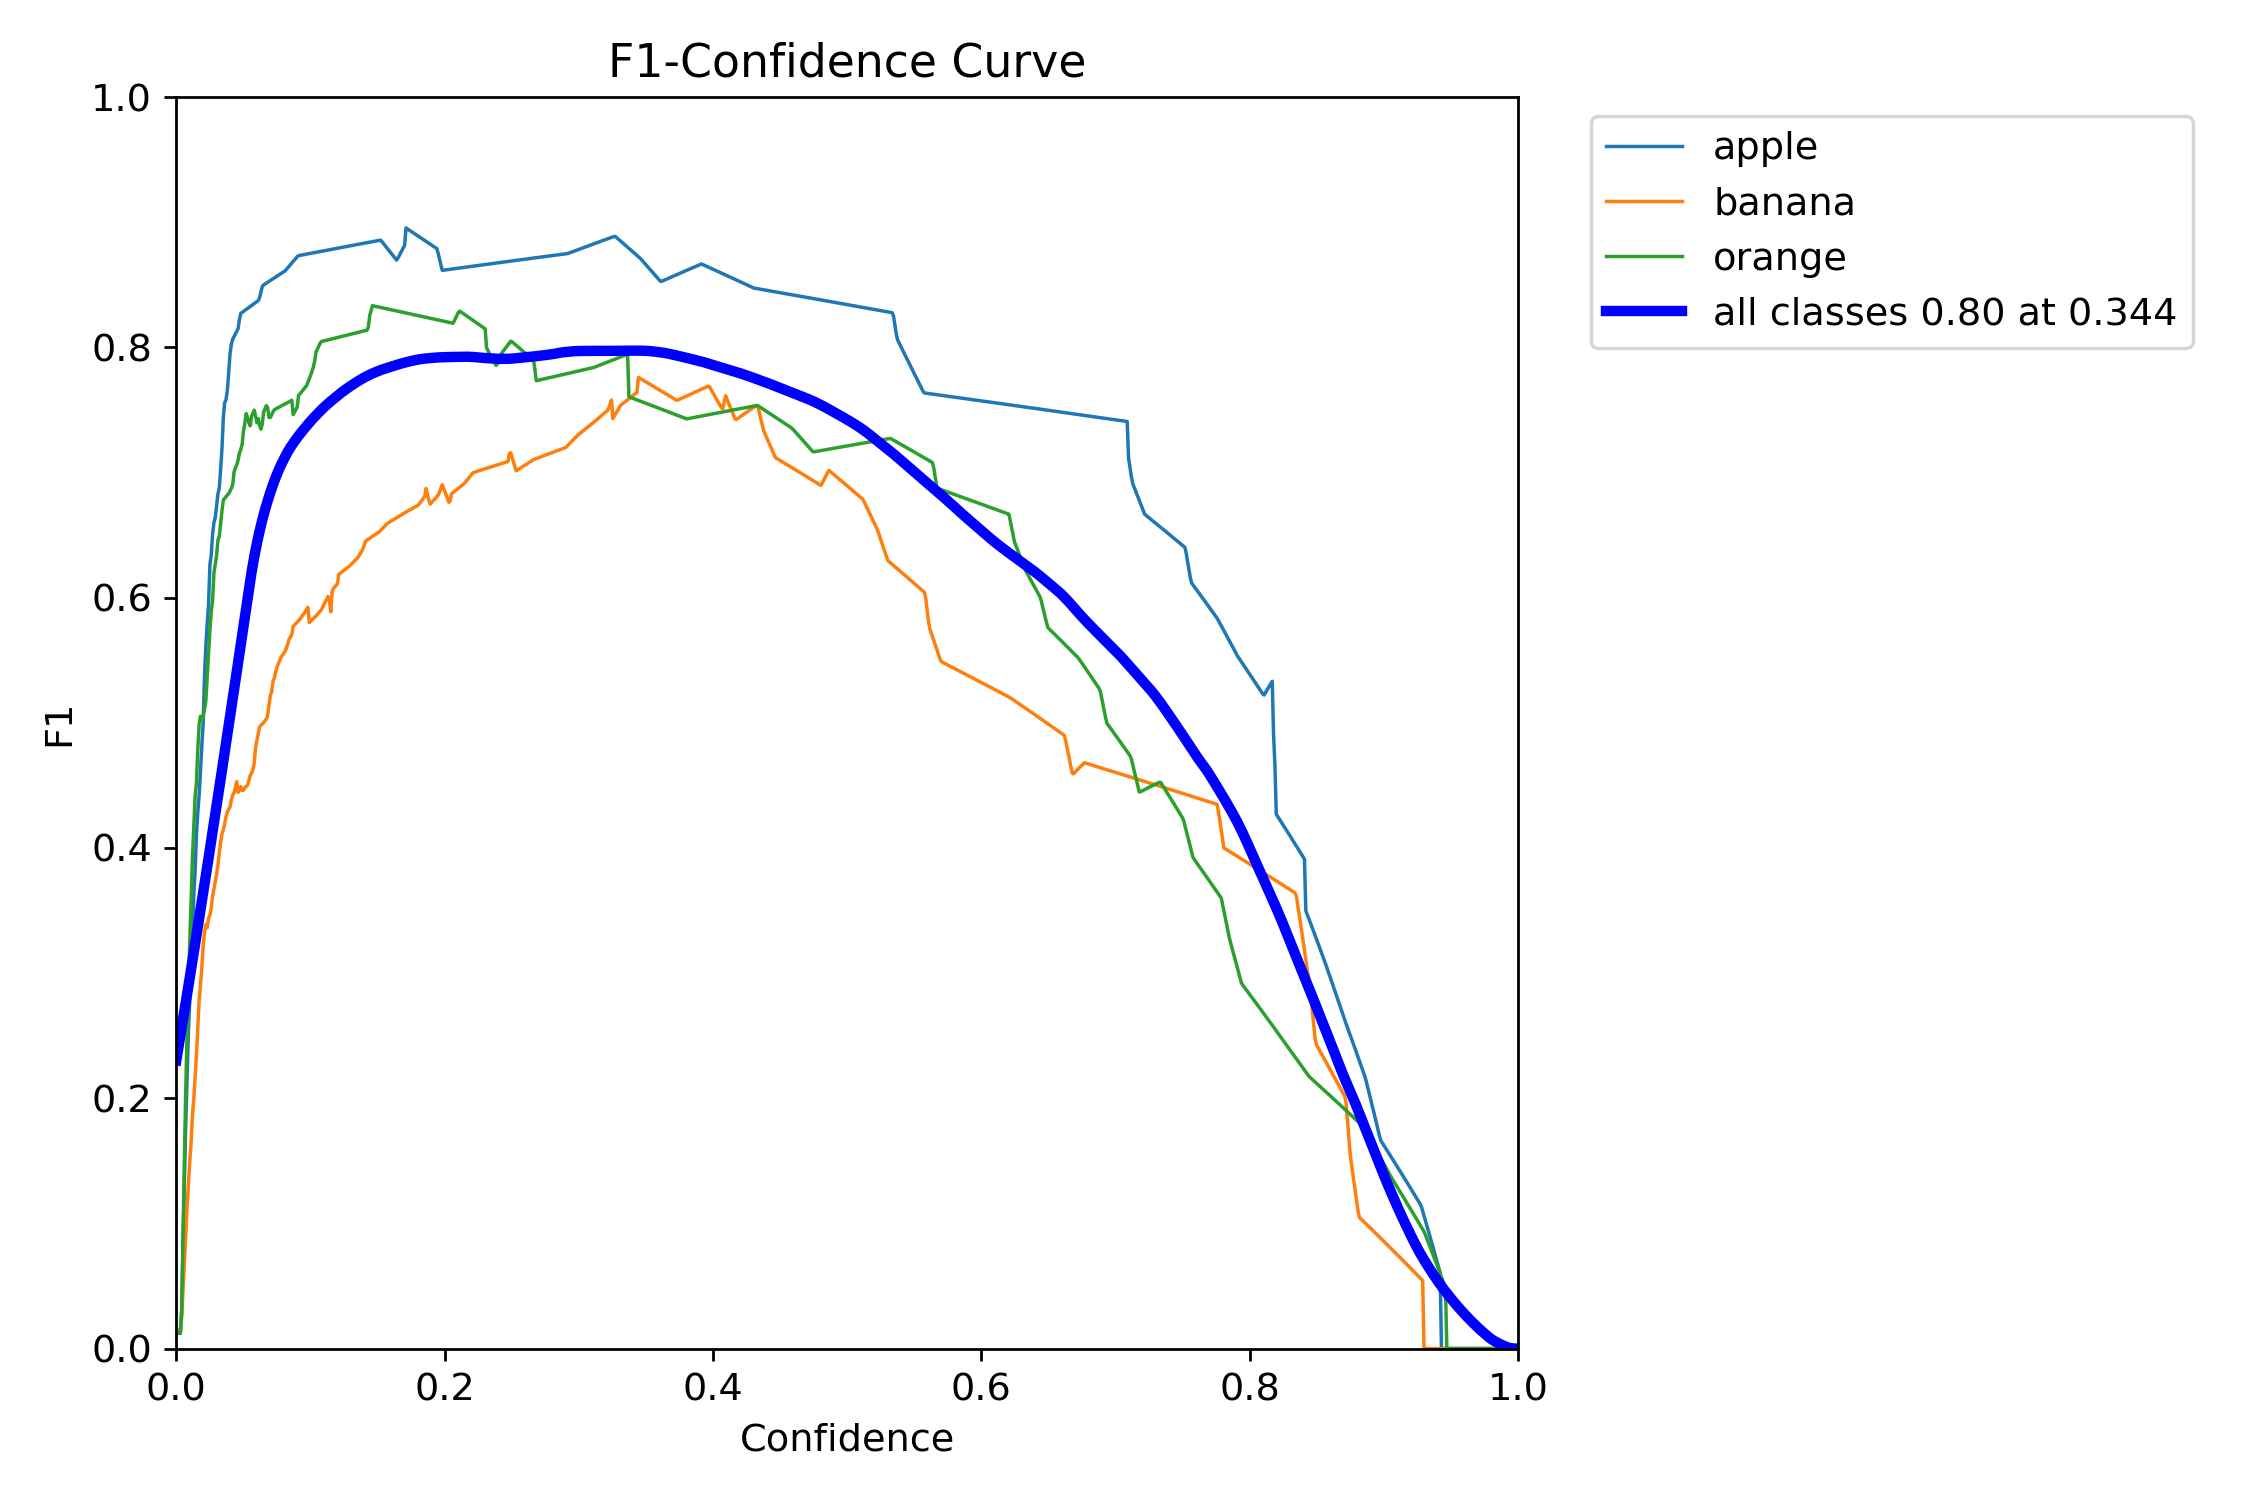

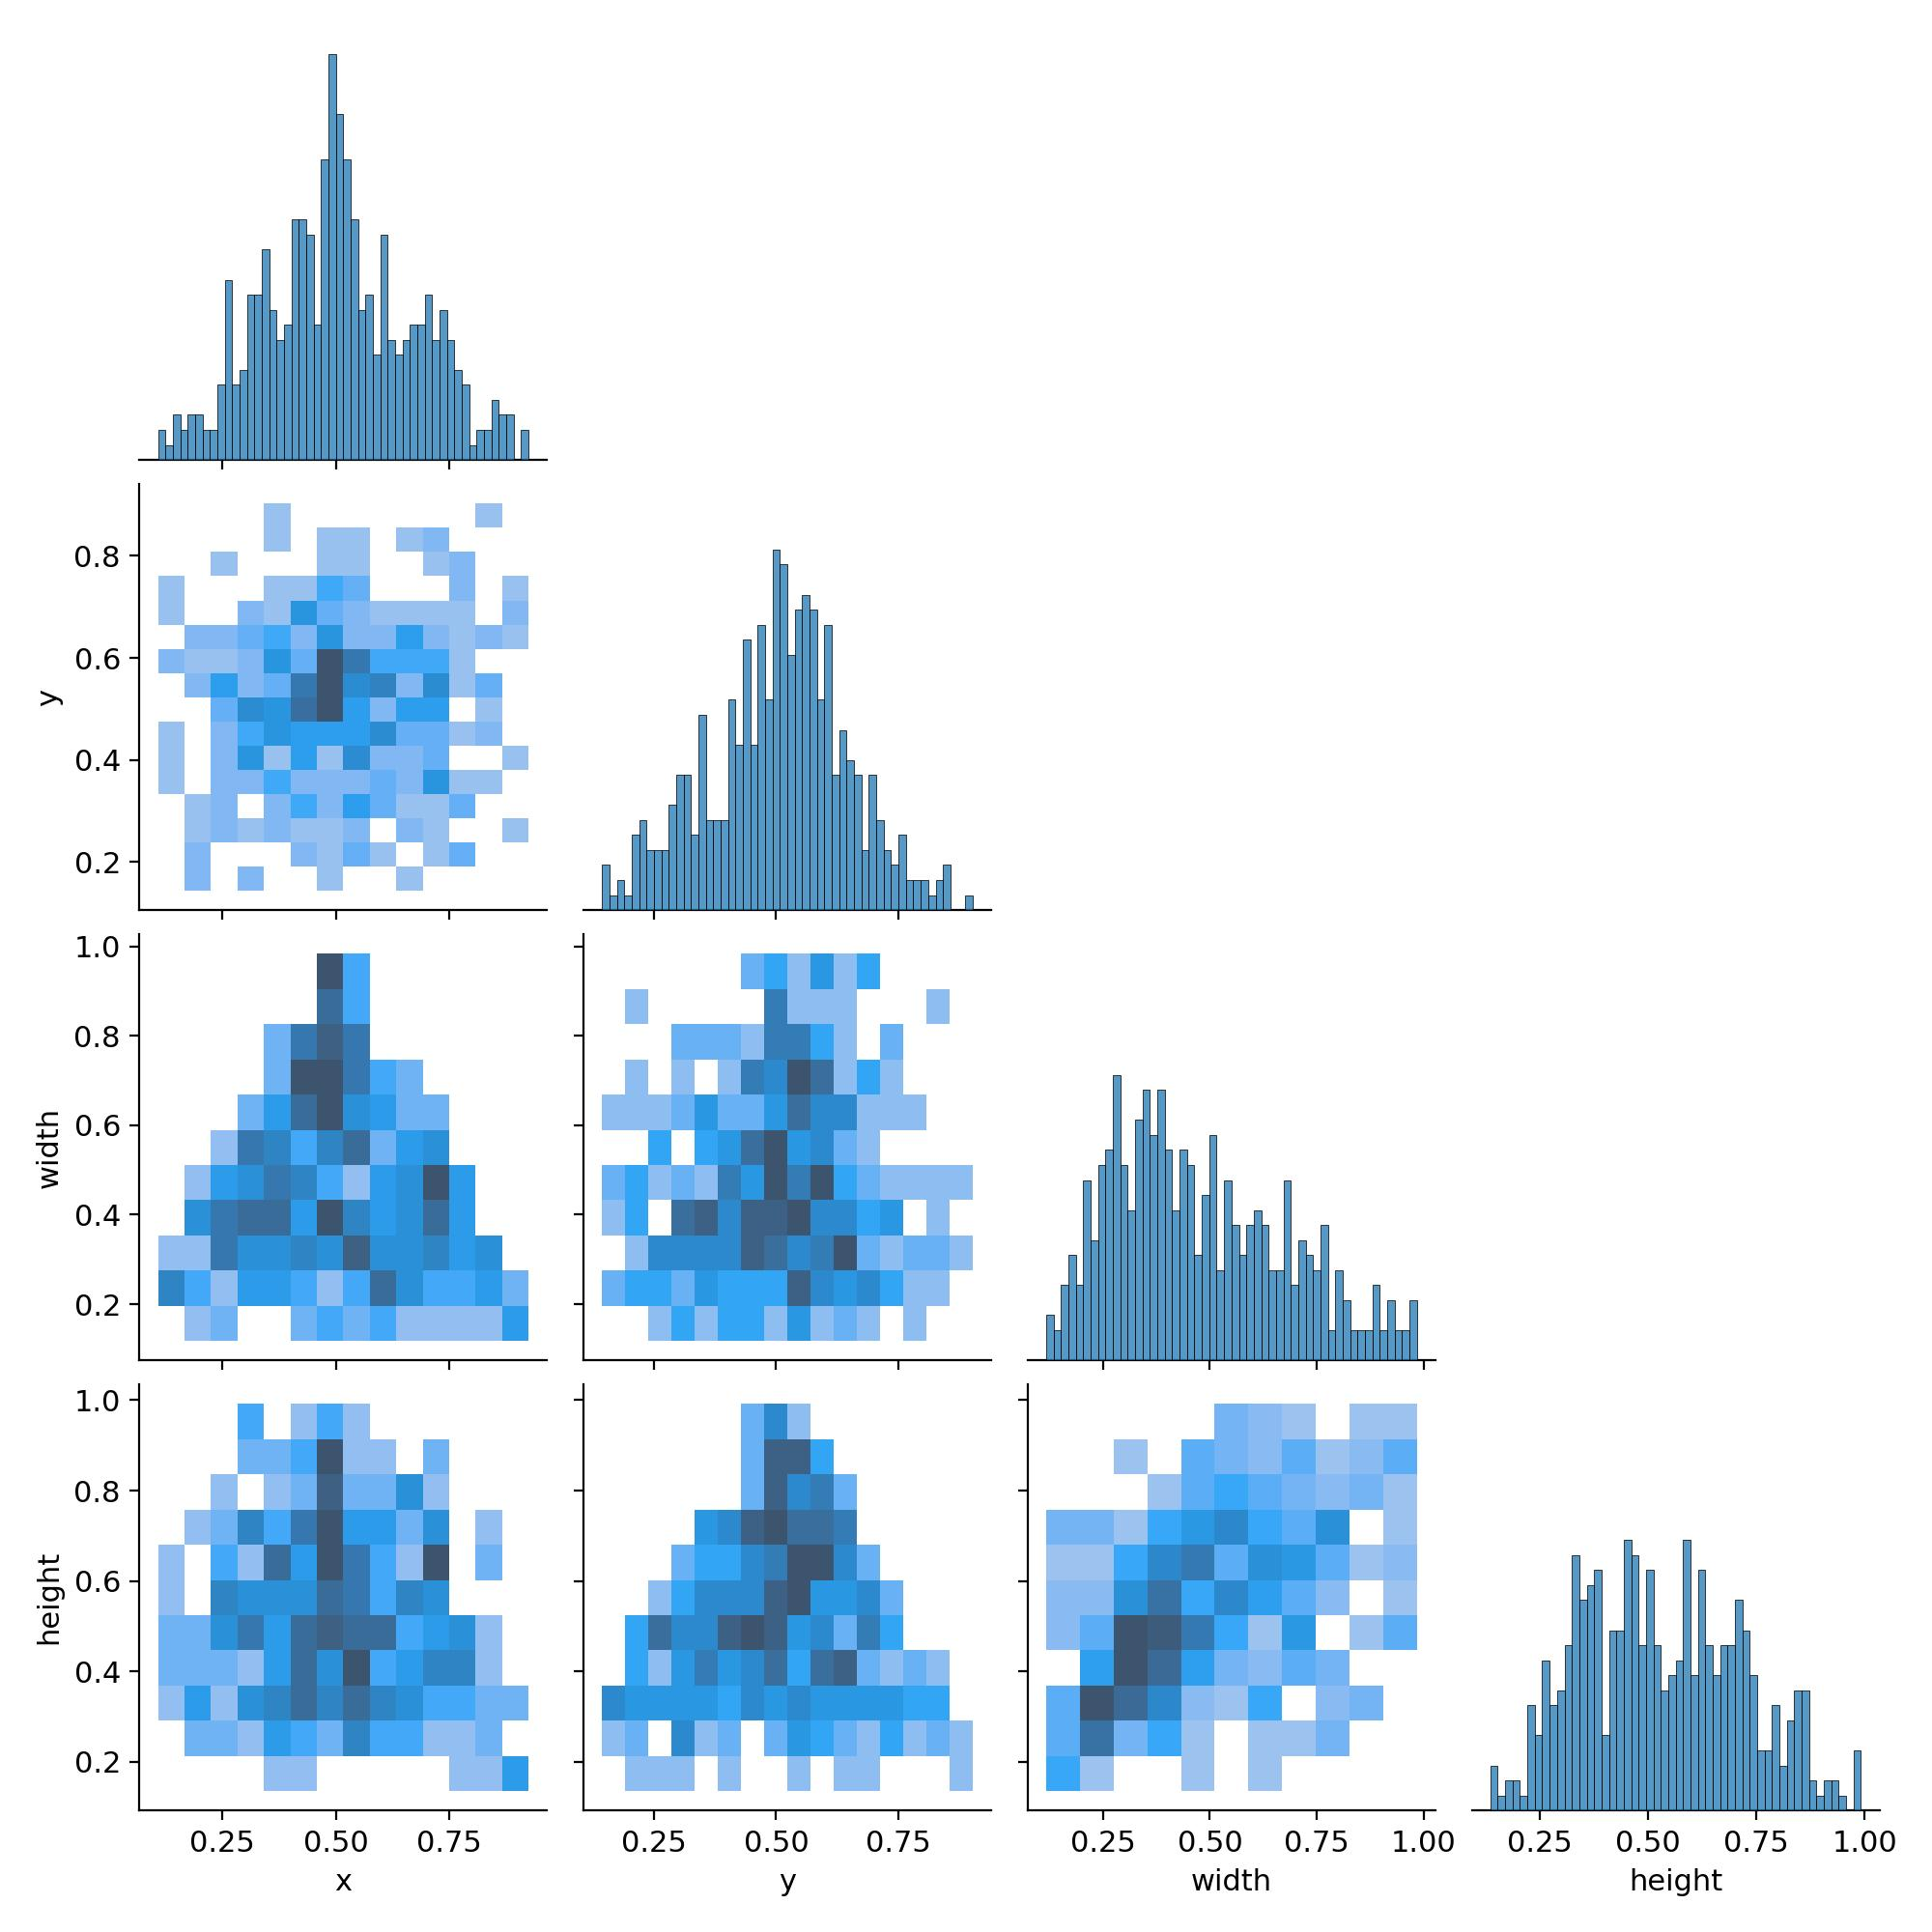

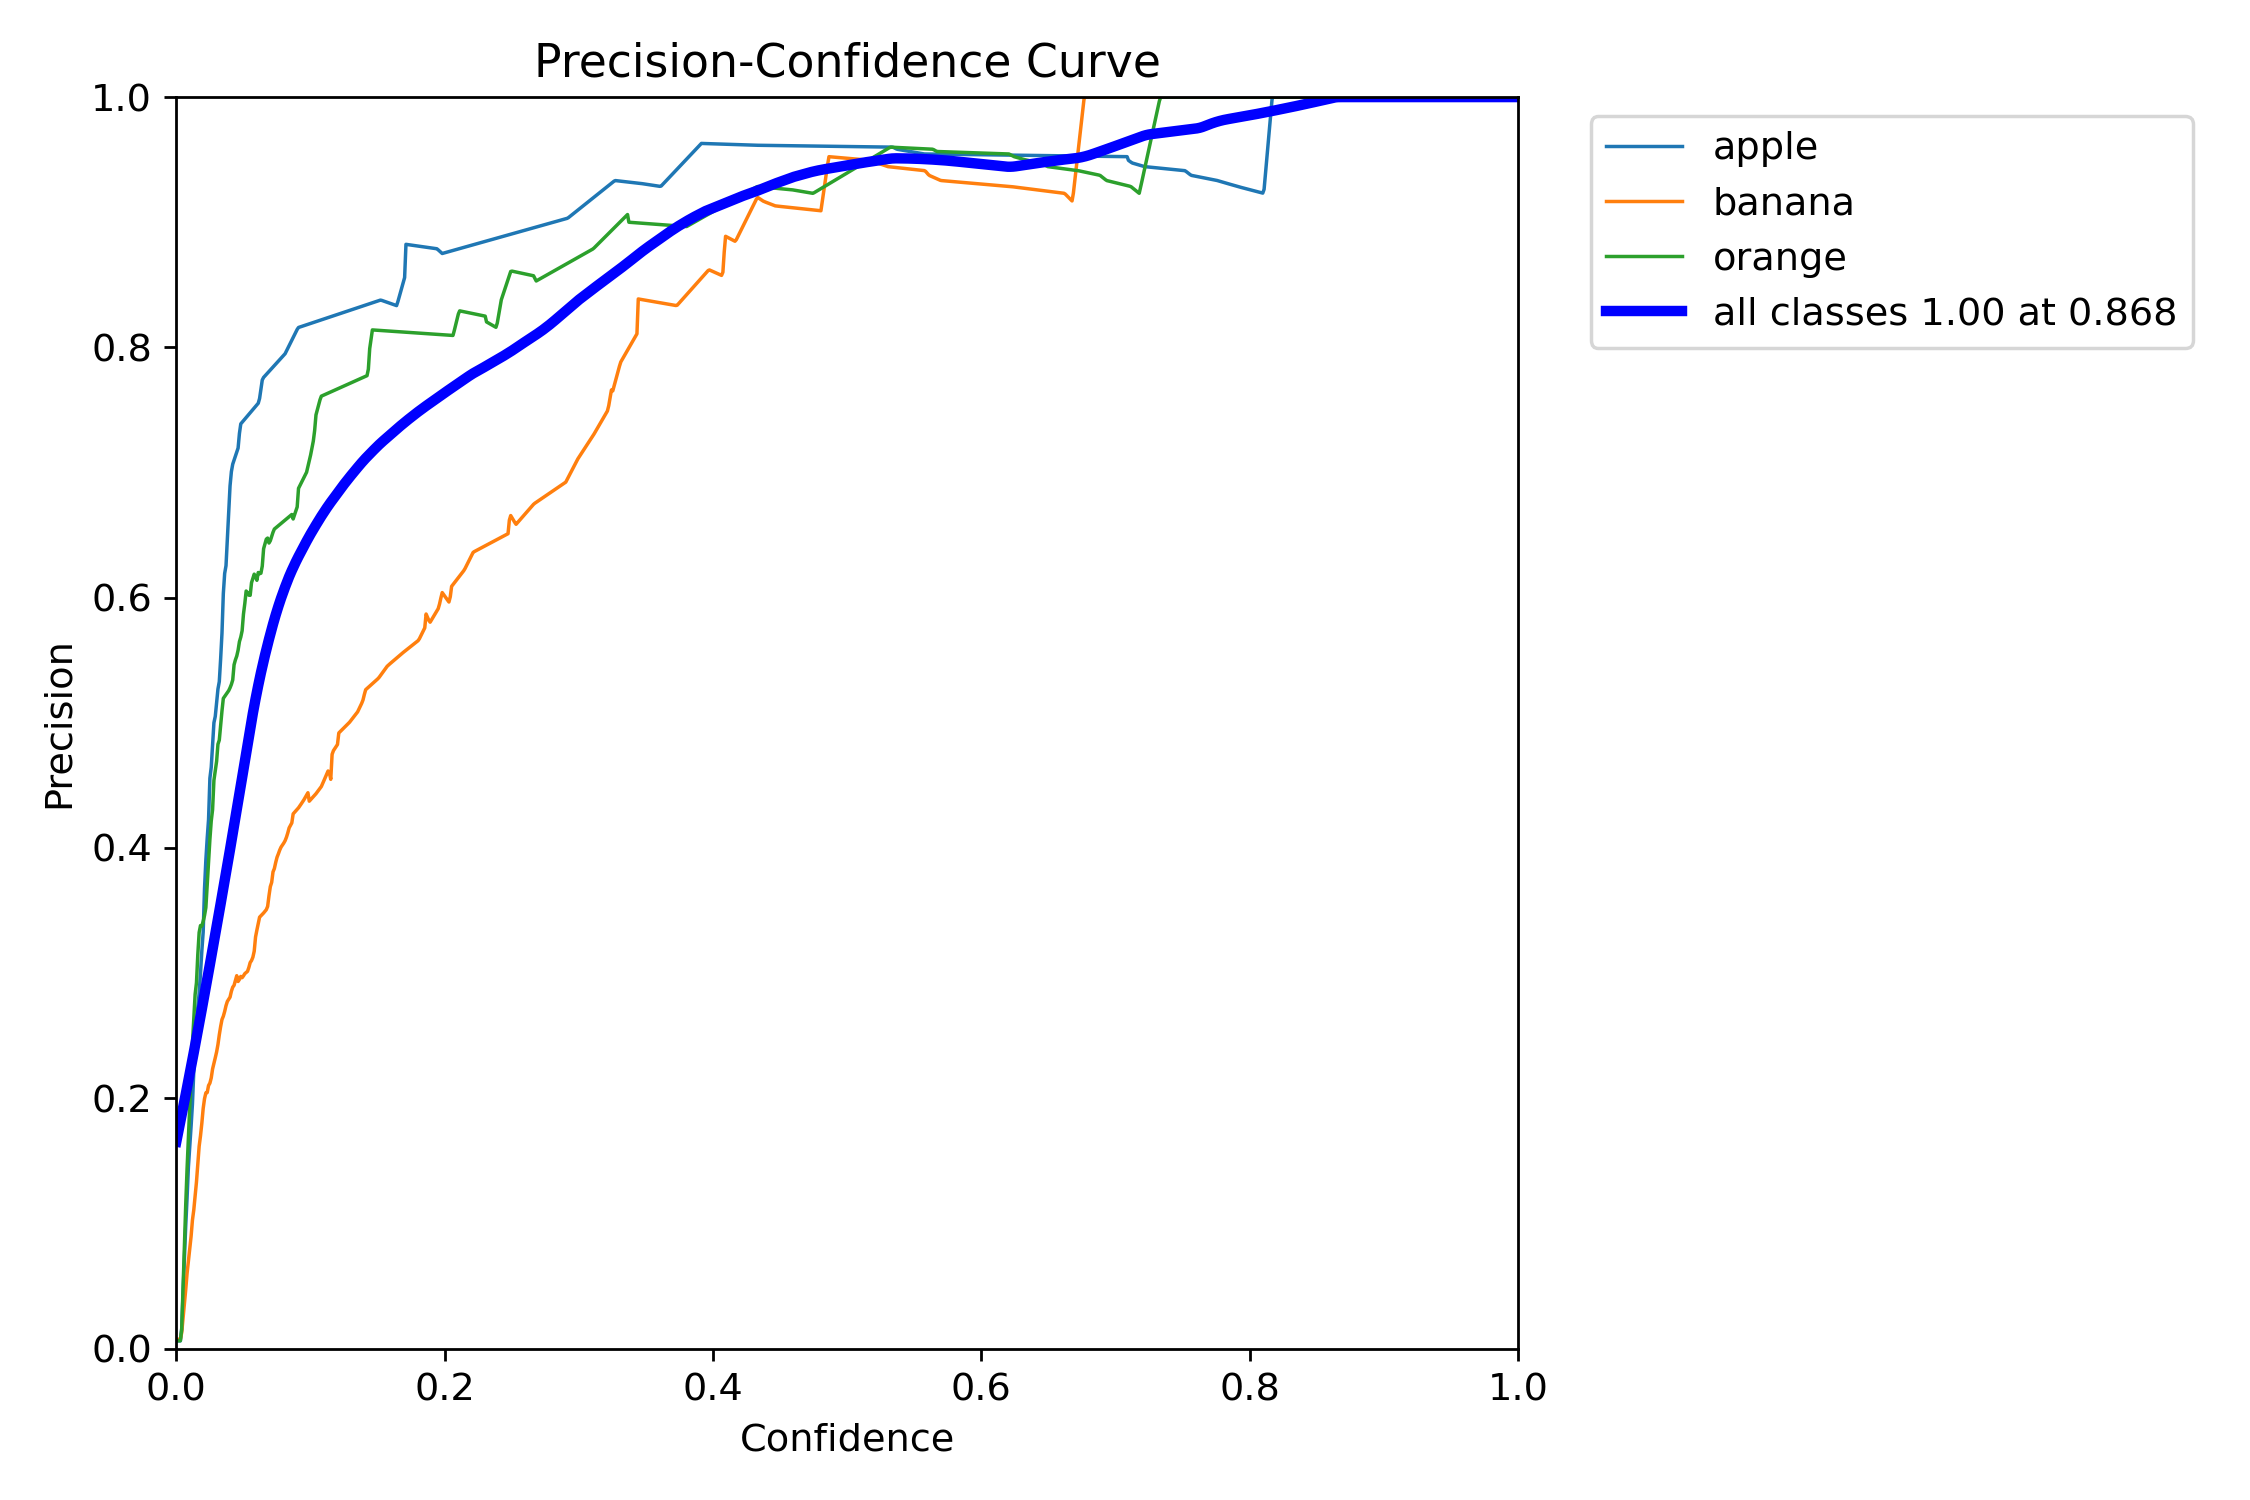

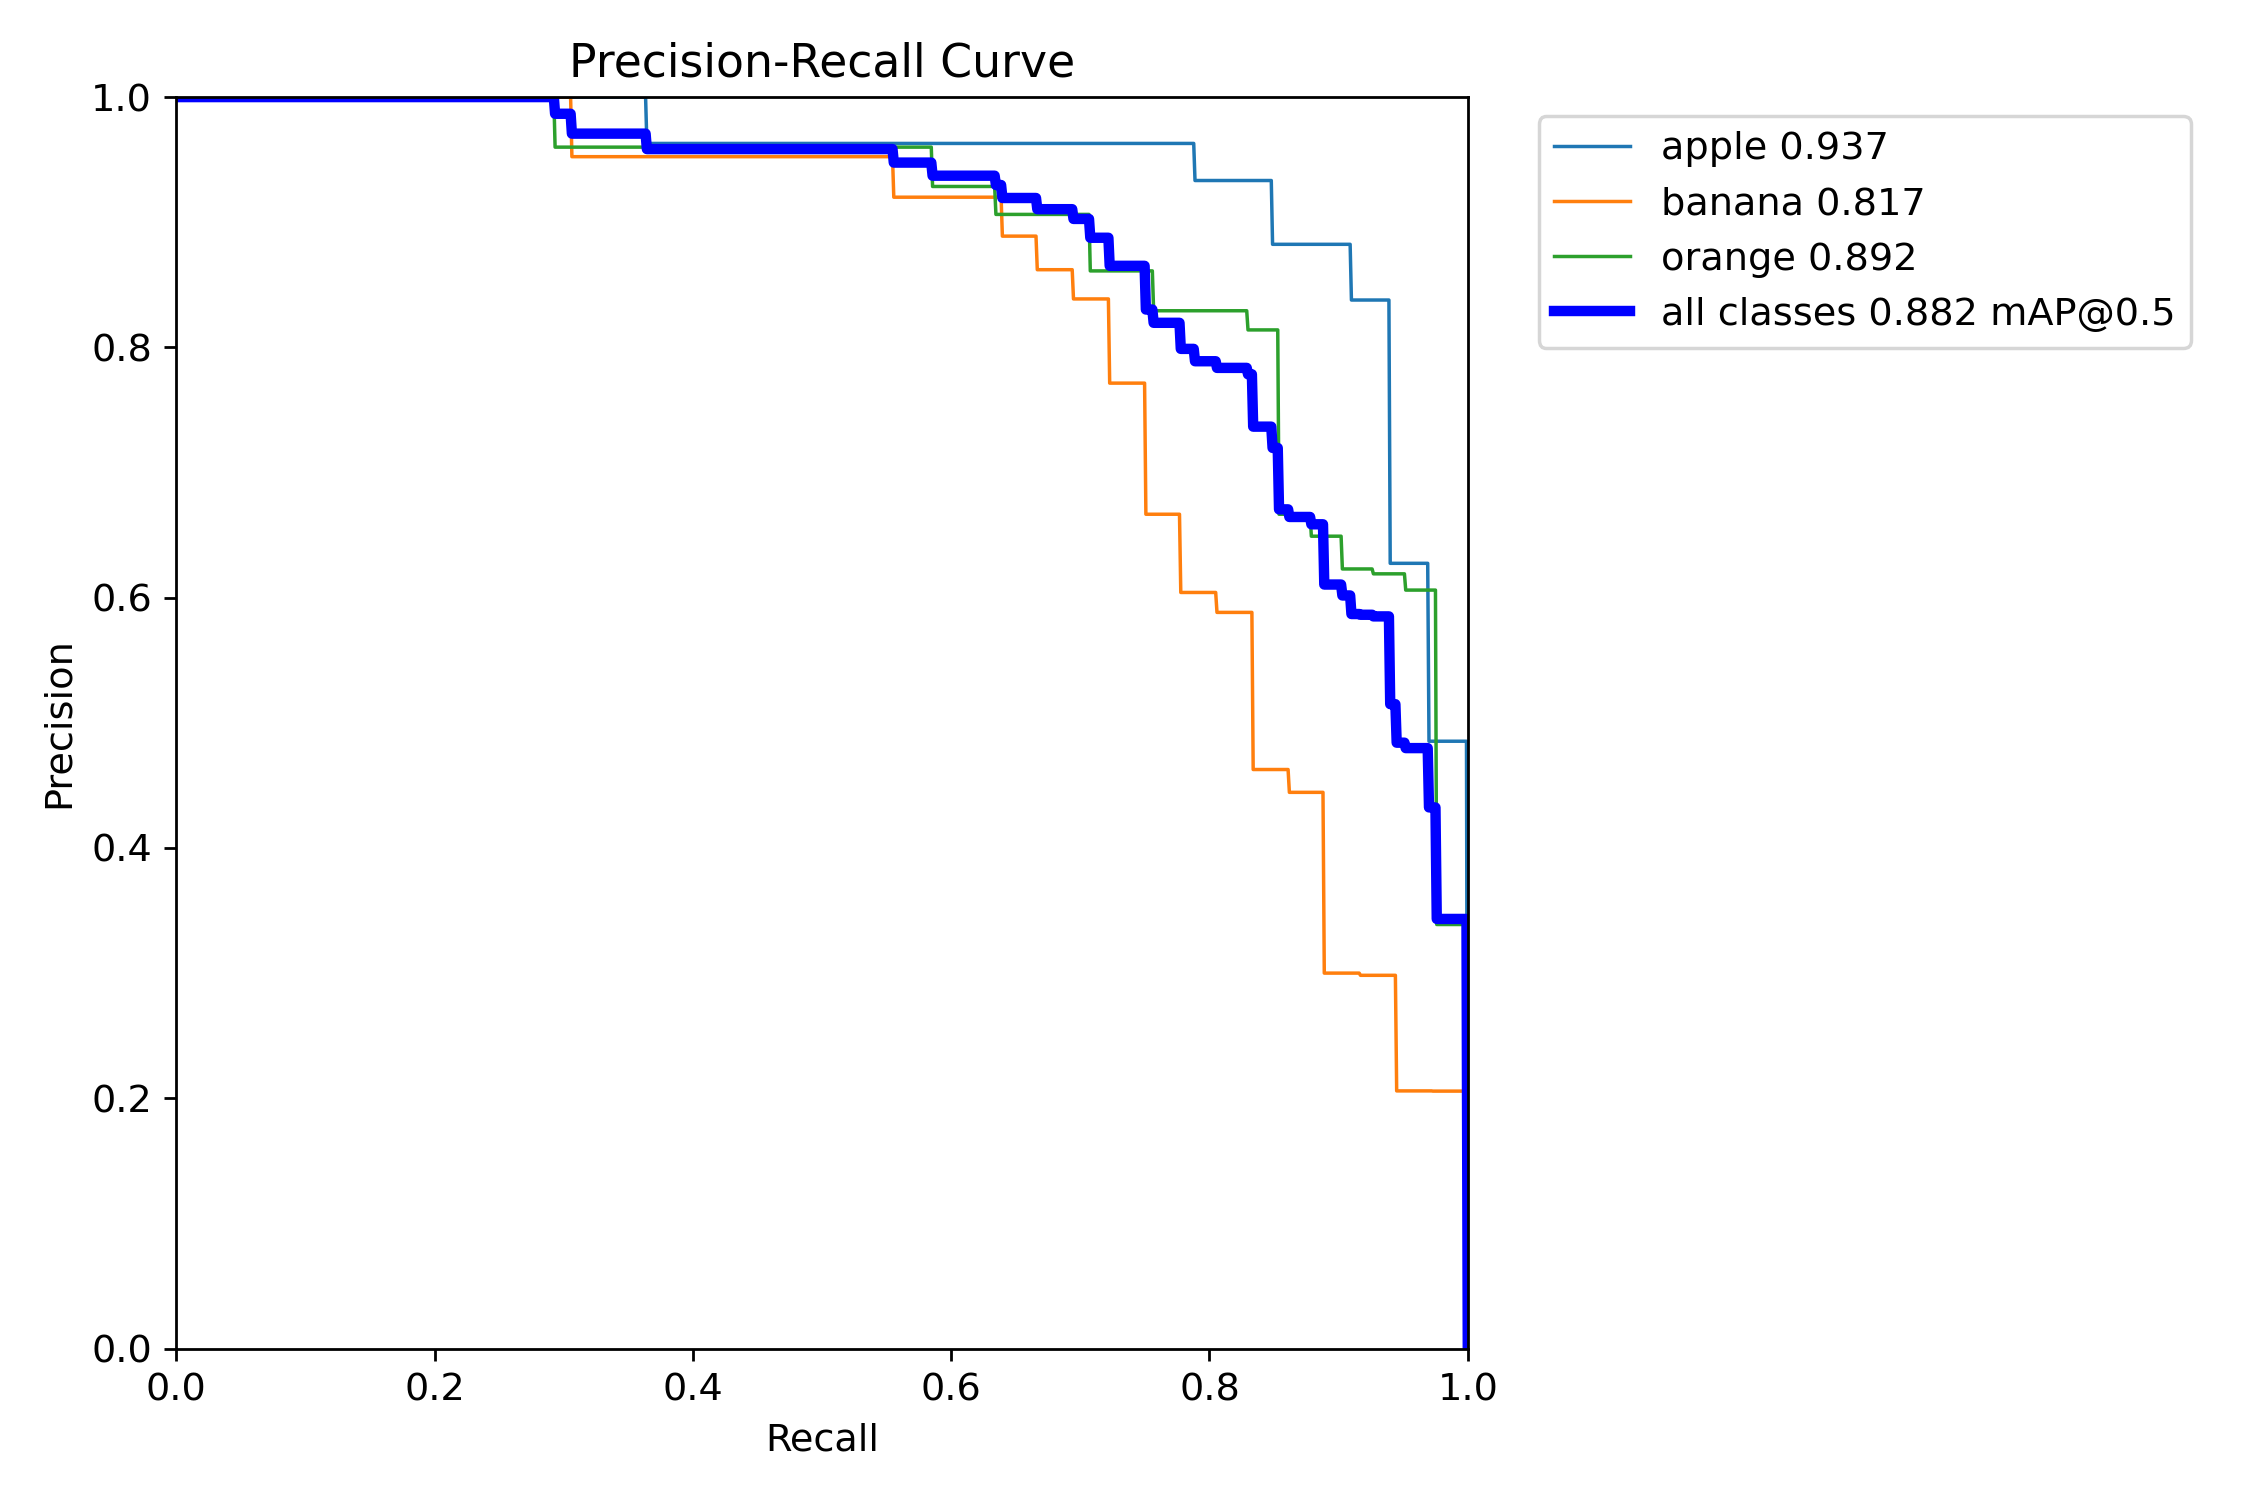

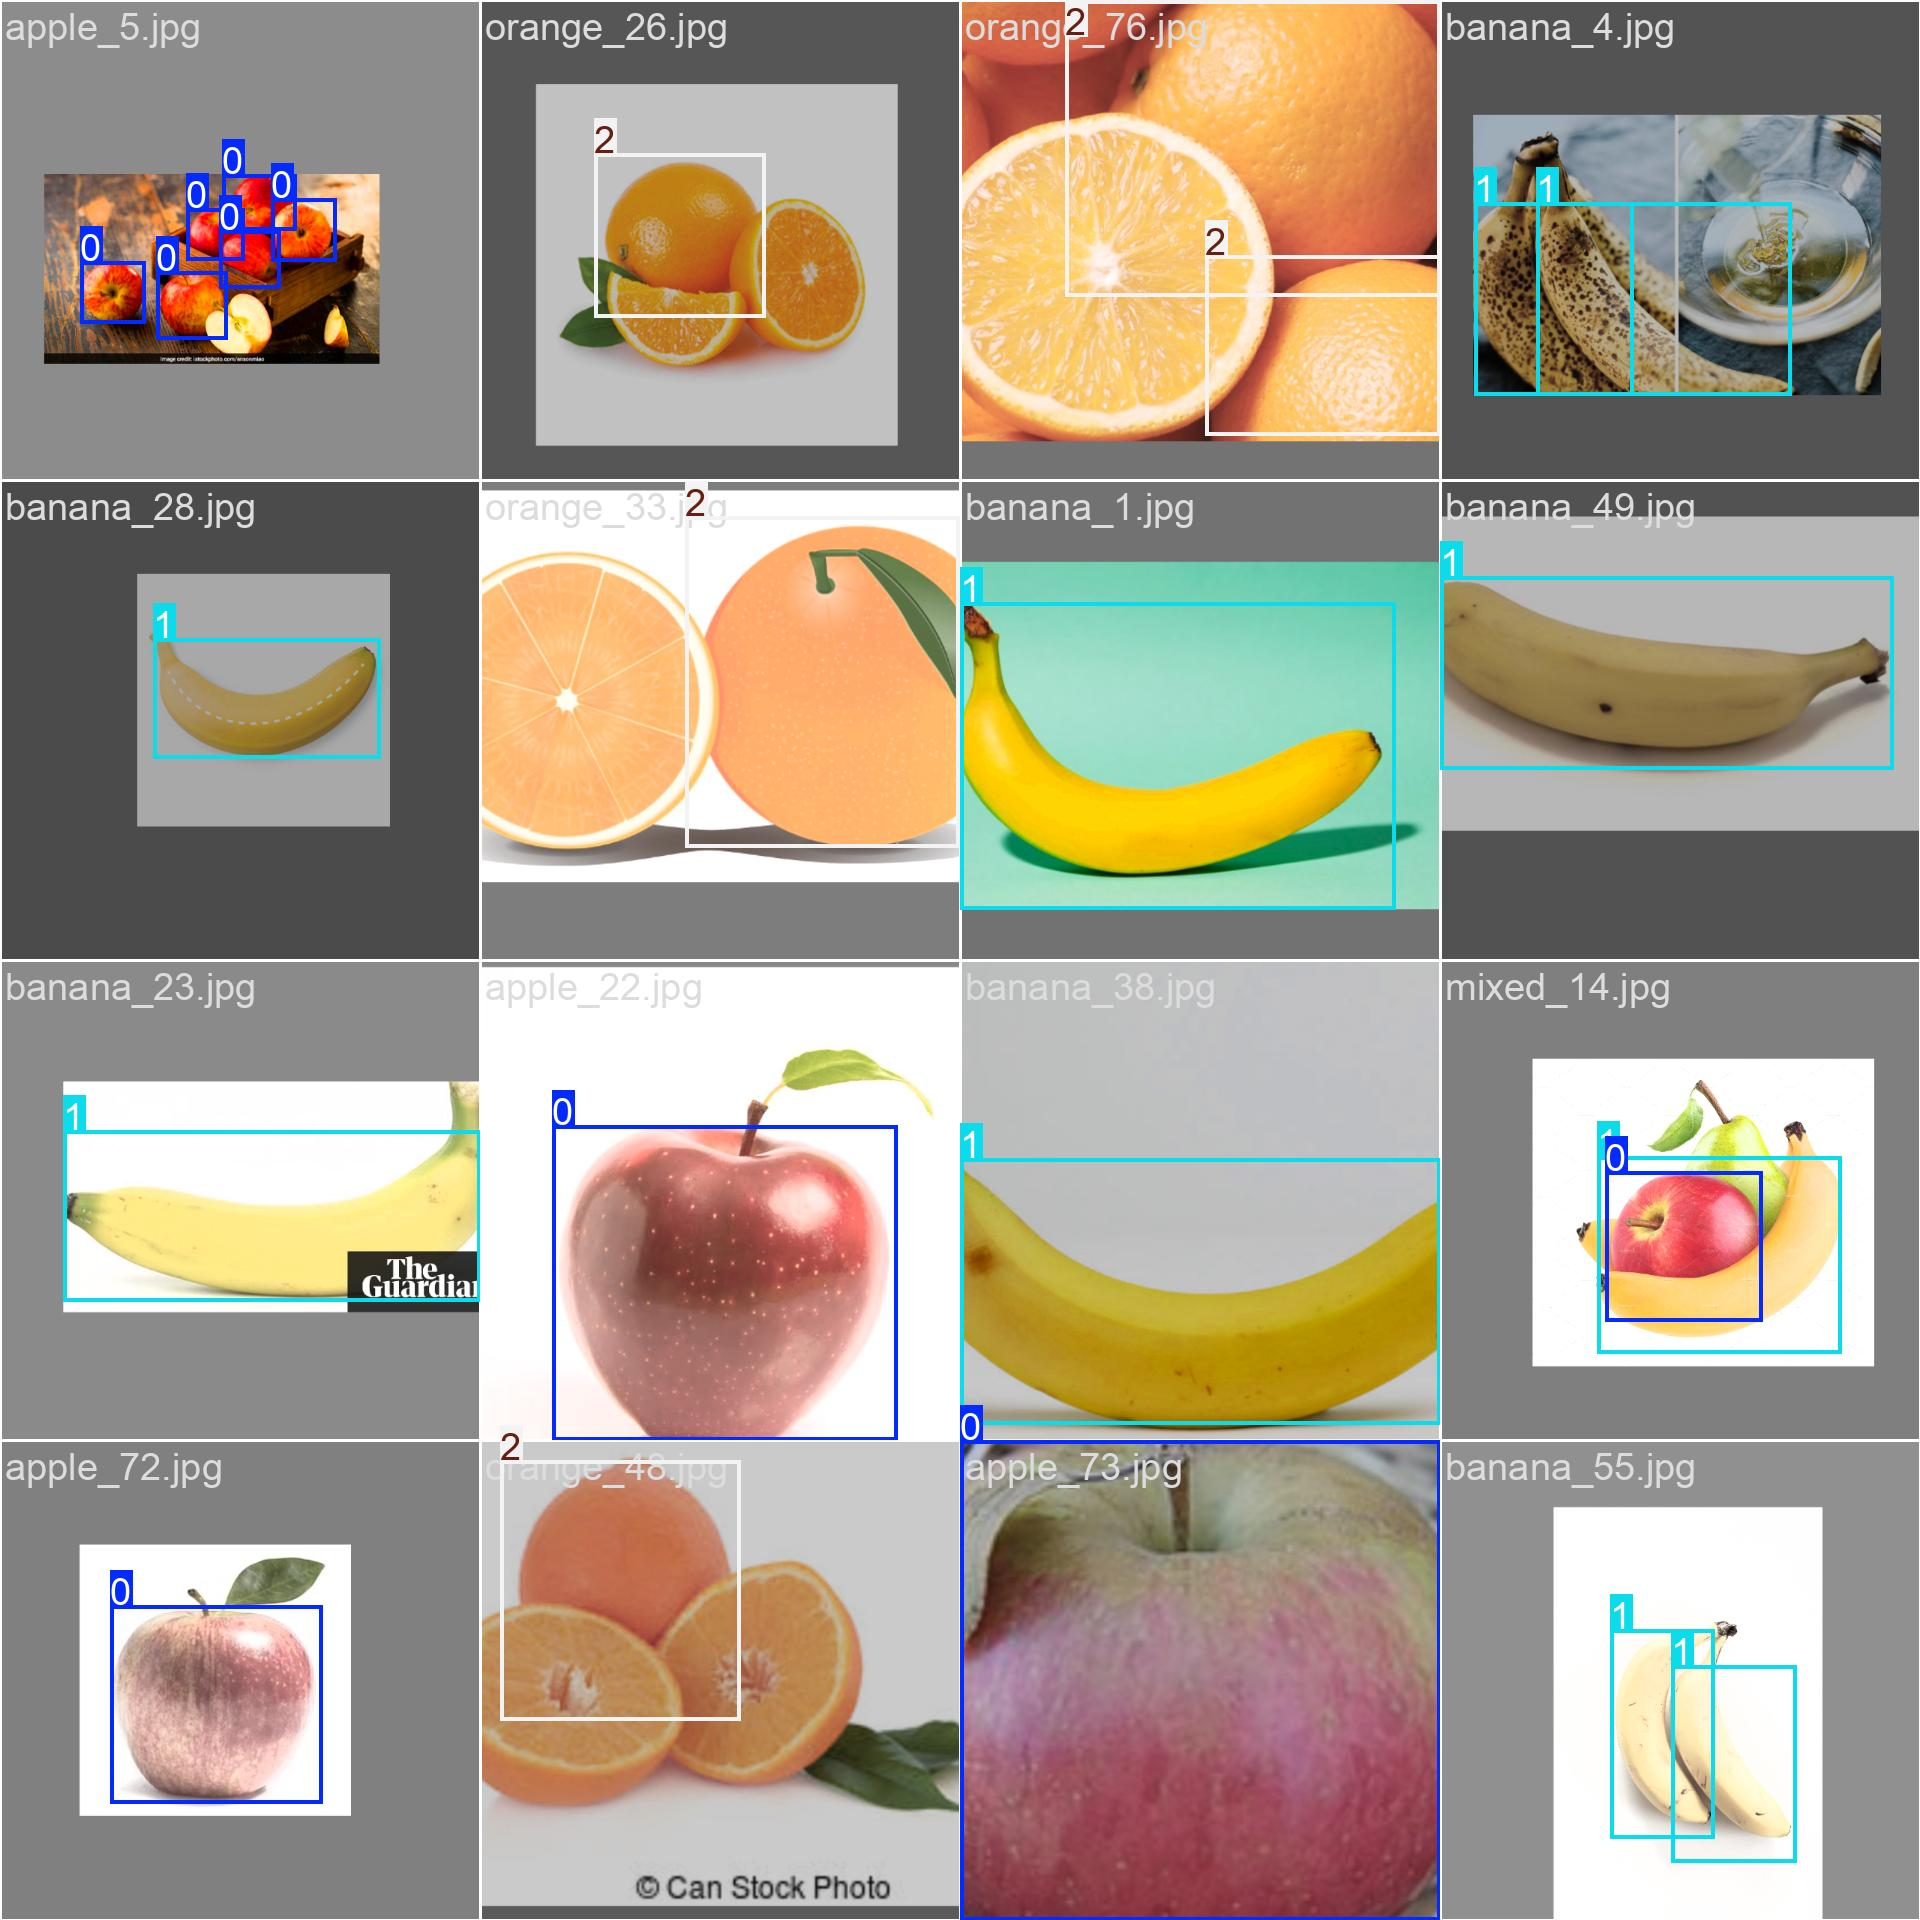

In [10]:
import os
from IPython.display import Image, display

path='/kaggle/working/runs/detect/train'
image=[f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

for i in range(len(image)):
    display(Image(filename=path+'/'+image[i]))

    
#References --> Md. Ismiel Hossen Abir, notebook=https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection

<h2>Part 11</h2>


image 1/1 /kaggle/working/object_detection/test/images/orange_90.jpg: 512x640 4 oranges, 42.9ms
Speed: 2.0ms preprocess, 42.9ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


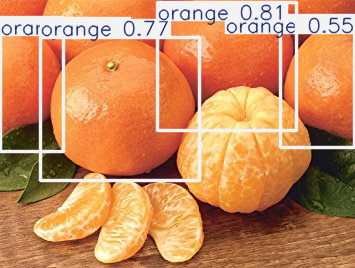

In [11]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  

results = model.predict("/kaggle/working/object_detection/test/images/orange_90.jpg")

results[0].show()

#References --> Md. Ismiel Hossen Abir, notebook=https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection

<h2>Part 12</h2>


image 1/1 /kaggle/input/fruit-images-for-object-detection/test_zip/test/mixed_24.jpg: 384x640 1 apple, 2 bananas, 43.8ms
Speed: 1.6ms preprocess, 43.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


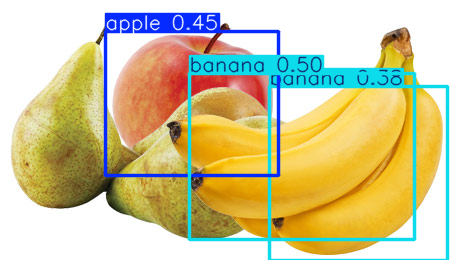

In [12]:
results = model.predict("/kaggle/input/fruit-images-for-object-detection/test_zip/test/mixed_24.jpg")

results[0].show()

#References --> Md. Ismiel Hossen Abir, notebook=https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection

I tried to apply what I have learned so far, and it became one of the best-performing notebooks. It would not be possible without the Kaggle community's generous knowledge share. I tried many things, which include inspirations from others' works or using directly their codeblocks.

Special thanks to:


To MuhammedBuyukkinaci for part 1 - datasets=https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection/data <br>
To Kurra Vishnuvardhan for part 2 - https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection<br>
To Kurra Vishnuvardhan for part 3 - https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection<br>
To Kurra Vishnuvardhan for part 4 - https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection<br>
To Kurra Vishnuvardhan for part 5 - https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection<br>
To Kurra Vishnuvardhan for part 6 - https://www.kaggle.com/code/vishnu1233/yolov8-for-object-detection<br>
To https://docs.ultralytics.com/quickstart/ for part 8 <br>
To https://docs.ultralytics.com/usage/python/ for part 9 <br>
To Md. Ismiel Hossen Abir for part 10 - https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection<br>
To Md. Ismiel Hossen Abir for part 11 - https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection<br>
To Md. Ismiel Hossen Abir for part 12 - https://www.kaggle.com/code/mdismielhossenabir/underwater-object-detection<br>



This notebook benefits best practices posted by the community